# Heart Disease Prediction with highest accuracy
### Modelling, Heart Disease Prediction, Comparisons and Conclusion
## DSI7 - Capstone Project 
### By Didem Iscan


## Outline

1. Introduction
2. Data Cleaning
    - Importing 4 different dataset & building a data frame
    - Predicting missing values
3. EDA 
    - Data description & plotting
4. Modelling & Predicting
    - Finding the best model & predict heart disease with highest accuracy  
5. Comparing Best Model with dropped missing values vs predicted missing values
    - Defining new data frame (dropped null values)
    - Model the data frame & compare your scores with the best model
6. Conclusion

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm_notebook
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV, ElasticNetCV, LogisticRegression, LogisticRegressionCV, Perceptron
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

import imp
#plotter = imp.load_source('plotter', './plotting-code/roc_plotter.py')
#from plotter import ROCLogisticPlotter

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
#warnings.filterwarnings(action='ignore', category=SettingWithCopyWarning)
#warnings.exceptions(action='ignore', category=UserWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
random_state = 1
#by assigning a random_state I will be using the same random models
np.random.seed(seed = 1)
#this fill fix my random arrays for the predicted values // each time I will have the same random list

### Importing the Data 

In [2]:
df = pd.read_csv('../DSI7_Capstone_Final/Datasets/df_nonull_updated.csv')

# 4. Modelling & Predicting

In this section, I analysed the data by using different models and find the best model which gives the best accuracy score for heart disease prediction. 

Subsections:
1. Defining Values
2. Modelling
3. Improving the Modelling & Accuracy Score
4. Model Selection

** Defining the Values **  
1. Define X & y
    - X: whole the dataset except pred_attributes column
    - y: pred_attributes
        - The predicted values are 0, 1, 2, 3, and 4. I categorised it as 0 and 1, classified them by having a heart disease (1), or healthy (0). I replaced 2, 3, 4 to 1. 
2. Standardize the X
3. Train&Test split
4. Try different modelling
    - Use classification model & confusion matrix
    - Compare the accuracy score for each model
5. Find the best model to predict heart disease


** Modelling ** 
1. Logistic Regression
2. Grid Search
3. Use models and print the accuracy score for each model
    - Compare the Cross Validation, Train, Test scores


** Improving the Modelling & Accuracy Score **

1. Finding the most related columns
    - Check the correlation 
    - Check the best features of models from grid search
        - choose the best columns 
2. Do the modelling for the best columns
    - Compare the new accuracy scores


** Model Selection ** 
1. Choose the best 3-5 models and continue analysis
    * Change the parameters by using GirdSearch and see the improvement
    * Pick the best model 

At the end I compared the scores and suggested the best model to predict heart disease. 

### Defining the Values

** Defining the X & y Values ** 

In [3]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 
        'slop', 'ca', 'thal','origin']]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,origin
0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,Cleveland
1,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,Cleveland
2,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,Cleveland
3,48.0,0.0,3.0,130.0,275.0,0.0,0.0,139.0,0.0,0.2,1.0,0.0,3.0,Cleveland
4,58.0,0.0,1.0,150.0,283.0,1.0,2.0,162.0,0.0,1.0,1.0,0.0,3.0,Cleveland


In [4]:
y = df[['pred_attribute']]

In [5]:
y.pred_attribute.value_counts()

0.0    411
1.0    196
2.0    135
3.0    135
4.0     43
Name: pred_attribute, dtype: int64

** Modifying the y value ** 

In [6]:
y['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)

In [7]:
y.pred_attribute.value_counts()

1.0    509
0.0    411
Name: pred_attribute, dtype: int64

** Get Dummies for Categorical Values & Standardizing the X ** 

In [8]:
X_dum = pd.get_dummies(X, columns= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slop', 'ca', 'thal', 'origin'], 
                       drop_first=True)

In [9]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X_dum)
Xs = pd.DataFrame(Xs, columns=X_dum.columns)
Xs.head()

,age,trestbps,chol,thalach,oldpeak,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_0.0,...,ca_1.0,ca_2.0,ca_3.0,ca_9.0,thal_3.0,thal_6.0,thal_7.0,origin_Hungarian,origin_LongBeach,origin_Switzerland
0,-1.328180,-0.104617,0.090045,1.365162,0.466988,-1.934494,2.070593,-0.533775,-1.081578,0.436083,...,-0.429,-0.295754,-0.167132,-0.032987,1.623688,-0.229416,-0.781798,-0.685309,-0.527046,-0.392847
1,0.370413,-0.630559,1.409697,1.015385,-0.283194,-1.934494,-0.482953,-0.533775,0.924575,0.436083,...,-0.429,-0.295754,-0.167132,-0.032987,1.623688,-0.229416,-0.781798,-0.685309,-0.527046,-0.392847
2,0.264251,0.421326,0.881836,0.626744,0.373216,-1.934494,2.070593,-0.533775,-1.081578,0.436083,...,-0.429,-0.295754,-0.167132,-0.032987,1.623688,-0.229416,-0.781798,-0.685309,-0.527046,-0.392847
3,-0.585045,-0.104617,0.714680,0.082646,-0.658286,-1.934494,-0.482953,1.873447,-1.081578,0.436083,...,-0.429,-0.295754,-0.167132,-0.032987,1.623688,-0.229416,-0.781798,-0.685309,-0.527046,-0.392847
4,0.476575,0.947268,0.785062,0.976521,0.091897,-1.934494,-0.482953,-0.533775,-1.081578,-2.293143,...,-0.429,-0.295754,-0.167132,-0.032987,1.623688,-0.229416,-0.781798,-0.685309,-0.527046,-0.392847


** Finding the Baseline ** 

In [10]:
y.pred_attribute.value_counts(normalize=True)
print('Baseline:')
print(y.pred_attribute.value_counts(normalize=True))

Baseline:
1.0    0.553261
0.0    0.446739
Name: pred_attribute, dtype: float64


** Train-Test Split ** 

In [11]:
y = y.pred_attribute

In [12]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3,random_state=random_state)

In [13]:
freqs = pd.DataFrame({'Training': [y_train.sum(),y_train.shape[0] - y_train.sum()],
                      'Test':[y_test.sum(), y_test.shape[0] - y_test.sum()]}, index=['Healthy', 'Sick'])
freqs['Total'] = freqs.Training + freqs.Test
freqs

,Training,Test,Total
Healthy,351.0,158.0,509.0
Sick,293.0,118.0,411.0


### Modelling

1. Define the models
2. Cross Validate on test data 
    - get CV score for train
3. Fit the model 
    - Check the train & test scores
    - Accuracy Scores

In [14]:
def grid_search_func_tt(model, params, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                        scoring='r2',cv=5):
    gs = GridSearchCV(
        estimator=model,
        param_grid=params,
        return_train_score=True,
        scoring=scoring,
        cv=cv,
        iid=False)

    gs.fit(X_train, y_train)

    print("Best score")
    print(gs.best_score_)
    print()
    print("Best estimator")
    print(gs.best_estimator_.get_params())
    print()

    predictions = gs.best_estimator_.predict(X_test)
    print('Test score: ', scoring_function(y_test, predictions))


    return gs

In [15]:
def score_compare(X_train,X_test,y_train,y_test,model):
    print('Model:', model)
    print('')
    print('CV Test Score:', cross_val_score(model, X_test, y_test, cv=5).mean())
    print('CV Train Score:', cross_val_score(model, X_train, y_train, cv=5).mean())

    model.fit(X_train, y_train)
    print('Training Data Accuracy Score:', model.score(X_train, y_train))
    print('Test Data Accuracy Score:', model.score(X_test, y_test))
    print('')


In [16]:
#regressor
params_dtr = {'max_depth': list(range(1,11))+[None],'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
              'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split':[5,10,15,20,25,30,40,50]}
params_rfr = {'n_estimators': np.arange(10,100,10), 'max_depth': np.linspace(10,10,10), 
              'max_features': ['auto','sqrt'], 'bootstrap':['True','False']}
params_bgr = {'base_estimator':[None, DecisionTreeRegressor(),KNeighborsRegressor(),SVR()],
              'n_estimators':np.arange(10,100,10), 'max_samples':np.linspace(0.8, 1.0, 3), 
              'max_features':range(int(3/4.*X.shape[1]), X.shape[1]+1), 'bootstrap':['True','False']}

#classifier
params_dtc = {'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,11), 'max_features':range(1,X.shape[1]+1),
              'min_samples_split':[5,10,15,20,25,30,40,50]}
params_rfc = {'criterion': ['gini', 'entropy'], 'n_estimators':np.arange(10,100,10), 
              #'max_samples': np.linspace(0.8, 1.0, 3), 
              'bootstrap':['True','False'], 
              'max_features':['auto', 'sqrt', 'log2'], 'max_depth' : [1, 5, 10, 15, 20, 25, 30], 
              'min_samples_leaf' : [1, 2, 4, 6, 8, 10]}
params_bgc = {'base_estimator':[None, Perceptron(),KNeighborsClassifier(),SVC()], 
              'n_estimators':np.arange(10,100,10), 'max_samples': np.linspace(0.8, 1.0, 3), 
              'max_features':range(int(3/4.*X.shape[1]), X.shape[1]+1), 'bootstrap': ['True','False']}

In [17]:
#regressor
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()
model_bgr = BaggingRegressor()

#classifier
model_dtc = DecisionTreeClassifier()
model_rfc = RandomForestClassifier()
model_bgc = BaggingClassifier()

The function above is showing the train & test score of not fitted cross validated model and fitted without cross validated model.

- We are expecting to have higher training score when we fit the model. But at the end the train & test score should be close to each other, which will show us the data is not overfitted. 

** Logistic Regression**

In [18]:
model_lr = LogisticRegression(random_state=random_state)

In [19]:
score_compare(X_train,X_test,y_train,y_test,model_lr)

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

CV Test Score: 0.8227513227513228
CV Train Score: 0.8537770199761479
Training Data Accuracy Score: 0.8633540372670807
Test Data Accuracy Score: 0.8442028985507246



- The train & test data accuracy scores are close to each other and higher than the baseline, which shows us the model can do better prediction than the baseline. 

In [20]:
y_pred_lr = model_lr.predict(X_train)

In [21]:
confusion_matrix(y_train,y_pred_lr)

array([[251,  42],
       [ 46, 305]])

- From the confusion matrix above we can see the false negative score. 
- For medical analysis and predictions our aim is to have the lowest false negative, because we don't want to diagnose an unhealthy patient as a healthy patient. 
- Here the false negative score is 46/644 = 0.06 

In [23]:
print(classification_report(y_train, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85       293
         1.0       0.88      0.87      0.87       351

   micro avg       0.86      0.86      0.86       644
   macro avg       0.86      0.86      0.86       644
weighted avg       0.86      0.86      0.86       644



** Checking the Classifier Grid Search and Finding the Best Model **

In [24]:
gs_rfc = grid_search_func_tt(model_rfc, params=params_rfc, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
gs_bgc = grid_search_func_tt(model_bgc, params=params_bgc, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
gs_dtc = grid_search_func_tt(model_dtc, params=params_dtc, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

Best score
0.47930999203873154

Best estimator
{'bootstrap': 'False', 'class_weight': None, 'criterion': 'entropy', 'max_depth': 25, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Test score:  0.42265608238575414
Best score
0.4797449806965698

Best estimator
{'base_estimator__algorithm': 'auto', 'base_estimator__leaf_size': 30, 'base_estimator__metric': 'minkowski', 'base_estimator__metric_params': None, 'base_estimator__n_jobs': None, 'base_estimator__n_neighbors': 5, 'base_estimator__p': 2, 'base_estimator__weights': 'uniform', 'base_estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'), 'bootstrap': 'True', 'boo

In [25]:
score_compare(X_train,X_test,y_train,y_test,gs_dtc.best_estimator_)

Model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=14, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

CV Test Score: 0.816005291005291
CV Train Score: 0.7777457886106143
Training Data Accuracy Score: 0.8555900621118012
Test Data Accuracy Score: 0.8043478260869565



- The test & train accuracy scores are close to each other, so there isnt any overfitting on the data.
- CV scores are also close to each other, this shows us the model trained the data well for test data to predict correctly. 

In [26]:
score_compare(X_train,X_test,y_train,y_test,gs_rfc.best_estimator_)

Model: RandomForestClassifier(bootstrap='False', class_weight=None,
            criterion='entropy', max_depth=25, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

CV Test Score: 0.8260582010582012
CV Train Score: 0.8429241204531902
Training Data Accuracy Score: 0.9580745341614907
Test Data Accuracy Score: 0.8623188405797102



- The test & train accuracy scores are again close to each other, so there isnt any overfitting on the data.
- CV scores are not as close as dtc model. 

In [27]:
score_compare(X_train,X_test,y_train,y_test,gs_bgc.best_estimator_)

Model: BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap='True', bootstrap_features=False, max_features=11,
         max_samples=1.0, n_estimators=30, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

CV Test Score: 0.8517195767195768
CV Train Score: 0.8554121943947525
Training Data Accuracy Score: 0.9130434782608695
Test Data Accuracy Score: 0.855072463768116



- The test & train accuracy scores are close to each other, so there isnt any overfitting on the data.
- CV scores are also close to each other, this shows us the model trained the data well for test data to predict correctly. 

- The best model can be bgc or dtc, below by checking the accuracy scores, I choose the best model from the grid search

In [28]:
y_pred_class = gs_dtc.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class))

0.8555900621118012


In [29]:
y_pred_class = gs_rfc.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class))

0.9580745341614907


In [30]:
y_pred_class = gs_bgc.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class))

0.9130434782608695


- From the accuracy scores for each model, the highest score is from **gs_bgc** model. Next I am continuing analysing the confusion matrix on this model.

In [31]:
y_pred_rfc = gs_bgc.best_estimator_.predict(X_train)

In [32]:
print(confusion_matrix(y_train,y_pred_rfc))

[[261  32]
 [ 24 327]]


In [33]:
32/644

0.049689440993788817

- By using Grid Search and finding the best model our false positive rate has decreased to 32/644 = 0.04. Which shows that using Grid Search method with different models & parameters will increase our probability of correct predictions.  

In [34]:
print(classification_report(y_train, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90       293
         1.0       0.91      0.93      0.92       351

   micro avg       0.91      0.91      0.91       644
   macro avg       0.91      0.91      0.91       644
weighted avg       0.91      0.91      0.91       644



** Trying Other Models & Comparing the Accuracy Scores **

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import decomposition, preprocessing, svm
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier

In [36]:
models_names = ["k-Nearest Neighbors","Support Vector Machine","Linear SVM","RBF SVM","Gaussian Process",
                "Decision Tree","Extra Trees","Random Forest","Gradient Boost","AdaBoost","Gaussian Naive Bayes",
                "LDA","QDA","Logistic Regression","SGD Classifier","Multilayer Perceptron","Voting Classifier", 
                "Bagging Classifier"]

models = [KNeighborsClassifier(n_neighbors=3),
          SVC(random_state=random_state),
          SVC(kernel="linear",random_state=random_state),
          SVC(kernel="rbf",random_state=random_state),
          GaussianProcessClassifier(),
          DecisionTreeClassifier(random_state=random_state),
          ExtraTreesClassifier(random_state=random_state),
          RandomForestClassifier(random_state=random_state),
          GradientBoostingClassifier(random_state=random_state),
          AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),n_estimators=10,learning_rate=0.1,
                             random_state=random_state),
          GaussianNB(),
          LinearDiscriminantAnalysis(),
          QuadraticDiscriminantAnalysis(),
          LogisticRegression(random_state=random_state),
          SGDClassifier(),               
          MLPClassifier(hidden_layer_sizes=(100,),momentum=0.9,solver='sgd',random_state=random_state),
          VotingClassifier(estimators=[('log', LogisticRegression()), ('SVM',SVC(C=1000)), 
                                       ('MLP', MLPClassifier(hidden_layer_sizes=(100,)))], voting='hard'),
          BaggingClassifier(KNeighborsClassifier(),random_state=random_state)]

          

classifiers = {"k-Nearest Neighbors" : KNeighborsClassifier(n_neighbors=3),
               "Support Vector Machine" :  SVC(random_state=random_state),
               "Linear SVM" :  SVC(kernel="linear",random_state=random_state),
               "RBF SVM" :  SVC(kernel="rbf",random_state=random_state),
               "Gaussian Process" : GaussianProcessClassifier(),
               "Decision Tree" : DecisionTreeClassifier(random_state=random_state),
               "Extra Trees" : ExtraTreesClassifier(random_state=random_state),
               "Random Forest" : RandomForestClassifier(random_state=random_state),
               "Gradient Boost" : GradientBoostingClassifier(random_state=random_state),
               "AdaBoost" : AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),
                                               n_estimators=10,random_state=random_state,learning_rate=0.1),
               "Gaussian Naive Bayes" : GaussianNB(),
               "LDA" : LinearDiscriminantAnalysis(),
               "QDA" :  QuadraticDiscriminantAnalysis(),
               "Logistic Regression" : LogisticRegression(random_state=random_state),
               "SGD Classifier" : SGDClassifier(),
               "Multilayer Perceptron" :  MLPClassifier(hidden_layer_sizes=(100,),momentum=0.9,solver='sgd',
                                                        random_state=random_state),
               "Voting Classifier" : VotingClassifier(estimators=[('log', LogisticRegression()), ('SVM',SVC(C=1000)),
                                                                  ('MLP', MLPClassifier(hidden_layer_sizes=(100,)))],
                                                      voting='hard'),
               "Bagging Classifier" : BaggingClassifier(KNeighborsClassifier(),random_state=random_state)}

In [37]:
def score_compare(X_train,X_test,y_train,y_test,model):
    print('Model:', model)
    print('')
    print('CV Test Score:', cross_val_score(model, X_test, y_test, cv=5).mean())
    print('CV Train Score:', cross_val_score(model, X_train, y_train, cv=5).mean())

    model.fit(X_train, y_train)
    print('Training Data Accuracy Score:', model.score(X_train, y_train))
    print('Test Data Accuracy Score:', model.score(X_test, y_test))
    print('')

In [40]:
cv_train = []
cv_test = []
train = []
test = []
for model in models:
    cv_test.append(cross_val_score(model, X_test, y_test, cv=5).mean())
    cv_train.append(cross_val_score(model, X_train, y_train, cv=5).mean())
    model.fit(X_train,y_train)
    train.append(model.score(X_train, y_train))
    test.append(model.score(X_test, y_test))
    
scores_df = pd.DataFrame(cv_train, index=models_names)   
scores_df.columns=['CV Train Score']
scores_df['CV Test Score'] = cv_test
scores_df['Training Data Accuracy Score'] = train
scores_df['Testing Data Accuracy Score'] = test
scores_df['Train-Test Difference'] = scores_df['Training Data Accuracy Score'] - scores_df['Testing Data Accuracy Score']
scores_df.sort_values('CV Train Score', ascending=False)

,CV Train Score,CV Test Score,Training Data Accuracy Score,Testing Data Accuracy Score,Train-Test Difference
Logistic Regression,0.853777,0.822751,0.863354,0.844203,0.019151
Multilayer Perceptron,0.852311,0.837169,0.874224,0.855072,0.019151
Support Vector Machine,0.852251,0.833862,0.920807,0.836957,0.083851
RBF SVM,0.852251,0.833862,0.920807,0.836957,0.083851
Bagging Classifier,0.849246,0.848016,0.881988,0.869565,0.012422
Linear SVM,0.849102,0.808333,0.861801,0.829710,0.032091
LDA,0.847672,0.844444,0.850932,0.833333,0.017598
Gradient Boost,0.836710,0.818783,0.954969,0.851449,0.103520
Random Forest,0.832059,0.815212,0.993789,0.836957,0.156832
k-Nearest Neighbors,0.825929,0.818783,0.903727,0.851449,0.052277


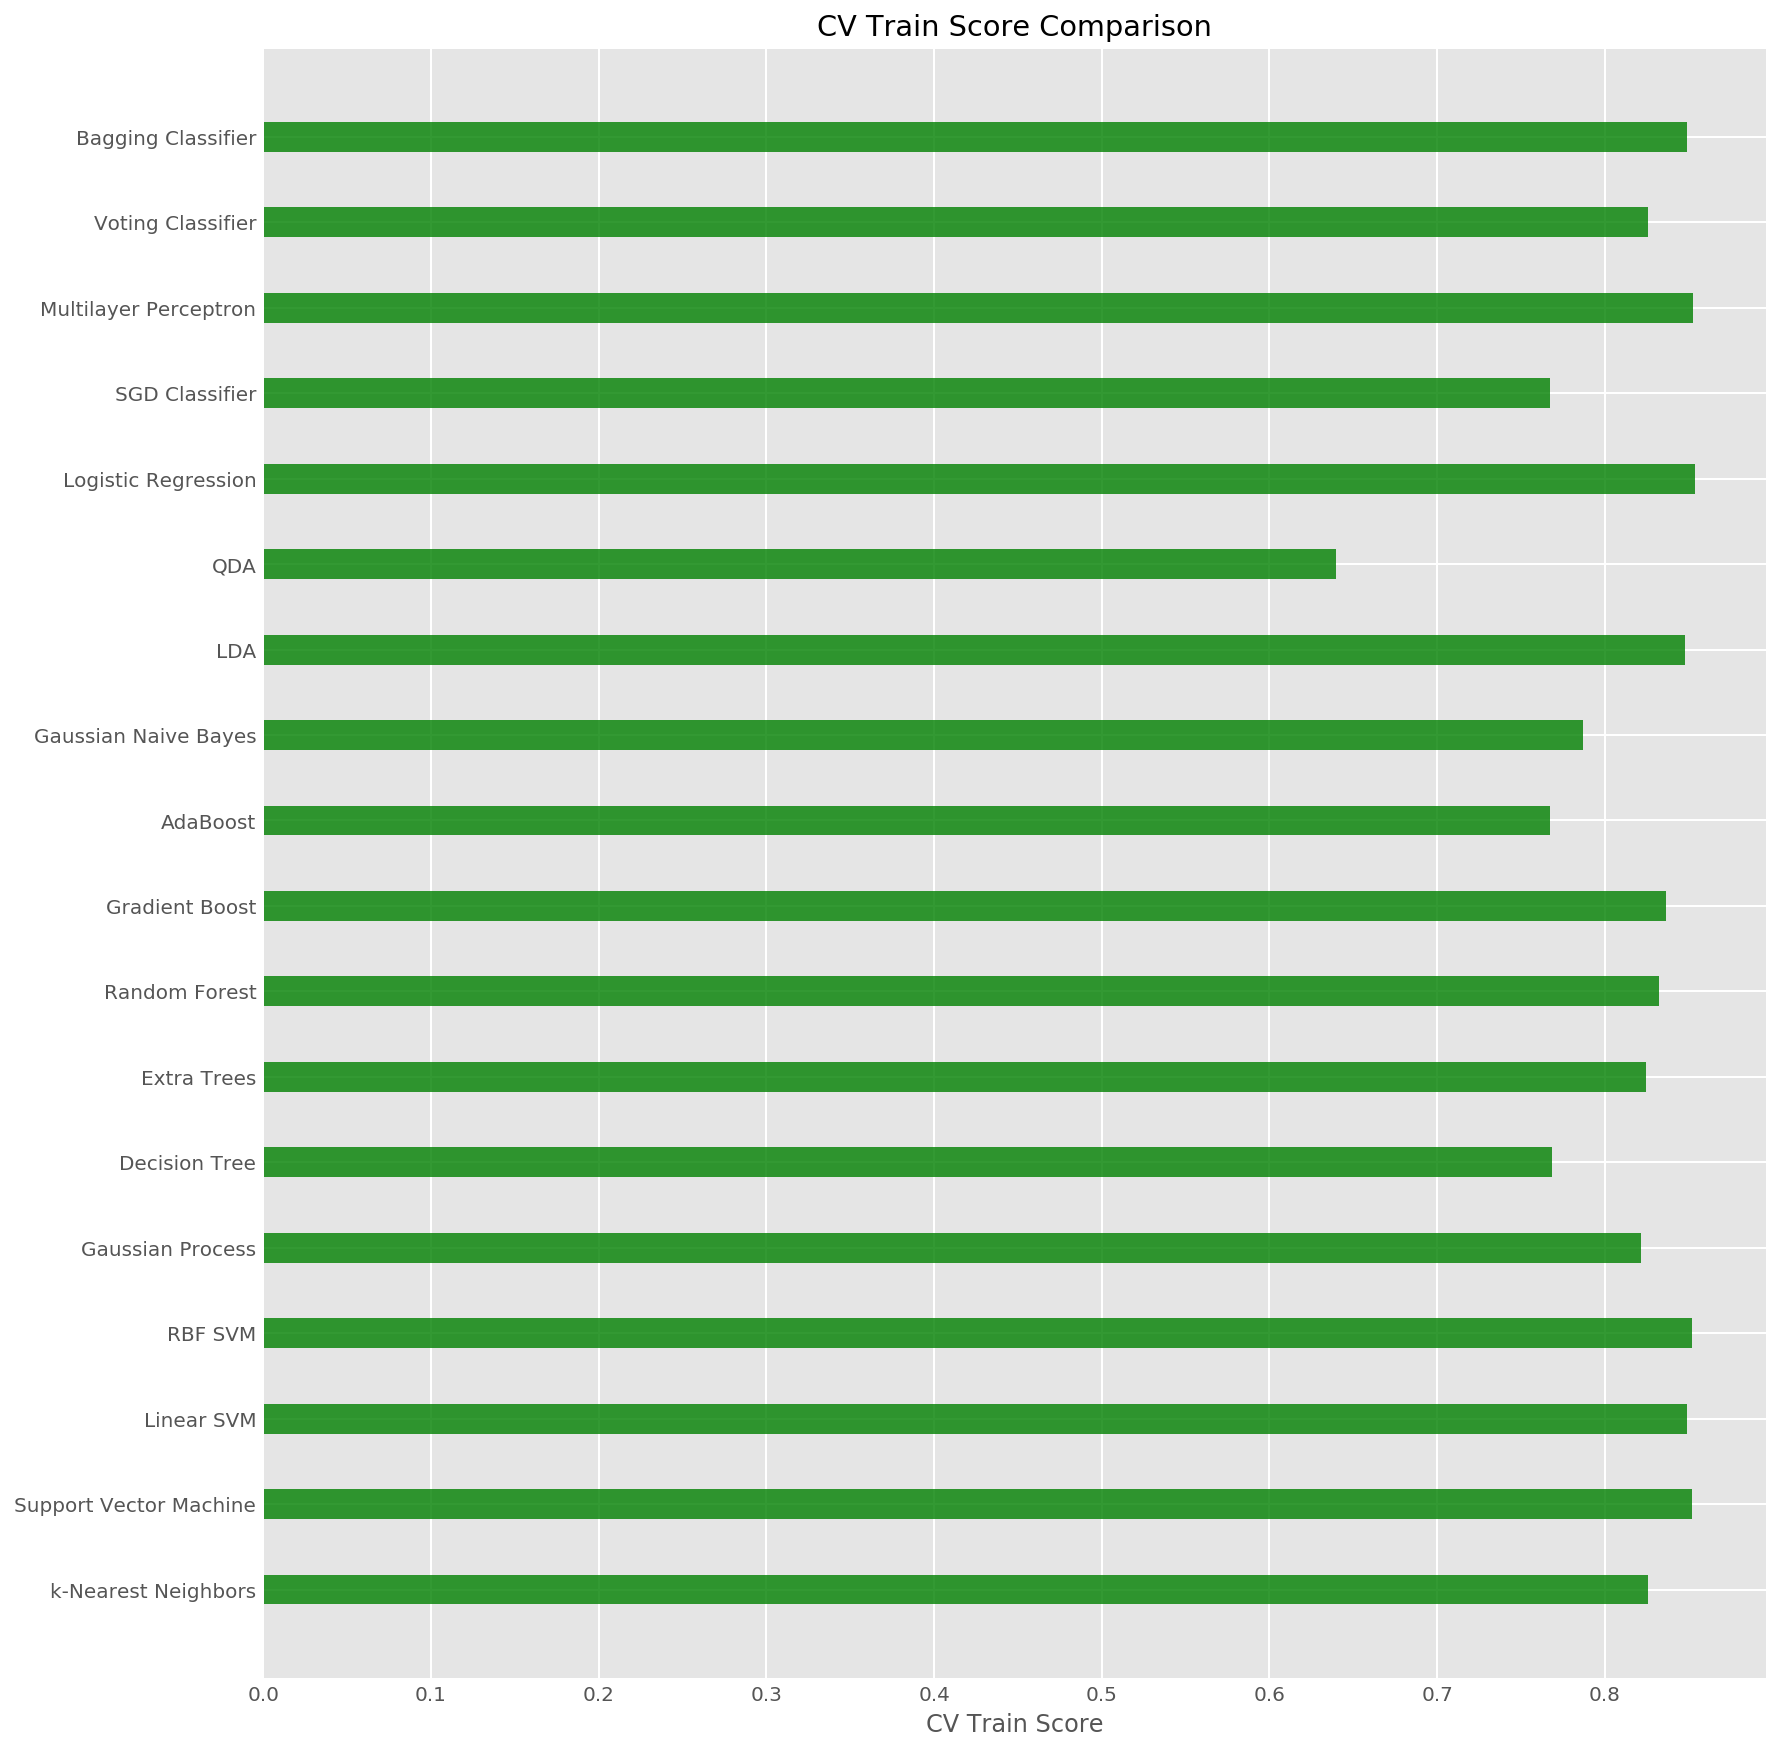

In [41]:
fig = plt.figure(figsize=(12,15))
index = models_names
bar_width = 0.35
y_pos = np.arange(len(index))

plt.barh(y_pos, scores_df['CV Train Score'], bar_width, align='center', alpha=0.8, color=['green'])
plt.yticks(y_pos, index)
plt.xlabel('CV Train Score')
plt.title('CV Train Score Comparison')
 
plt.show()

- Above I ran many different models to see the prediction and the score differences between different models. Here the scores are showing us if the model is training the data well. If it does than the test scores will be close to the training score. If not the test and train scores will have a big difference.  
- Decision Tree, Extra Trees and ADA Boost Classifier models gives us %100 accuracy score on the train data. But their test data is approximately 78-83%. 
- Overall the training scores are very high as we expected, and most of the test data is close to the train data. The most difference between these scores are in ADA Boost, Decision Tree, Extra Trees, GaussianProcessClassifier and RandomForestClassifier, which shows us there is overfitting on the data for those models.

In [42]:
df_copy=[]
for model in models:
    model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    df_copy.append(metrics.accuracy_score(pred_test, y_test))
    
models_df = pd.DataFrame(df_copy, index=models_names)   
models_df.columns=['AccuracyScore']
models_df.sort_values('AccuracyScore',ascending=False)

,AccuracyScore
Bagging Classifier,0.869565
Multilayer Perceptron,0.855072
Gradient Boost,0.851449
k-Nearest Neighbors,0.851449
Logistic Regression,0.844203
Extra Trees,0.840580
Voting Classifier,0.840580
Random Forest,0.836957
RBF SVM,0.836957
Support Vector Machine,0.836957


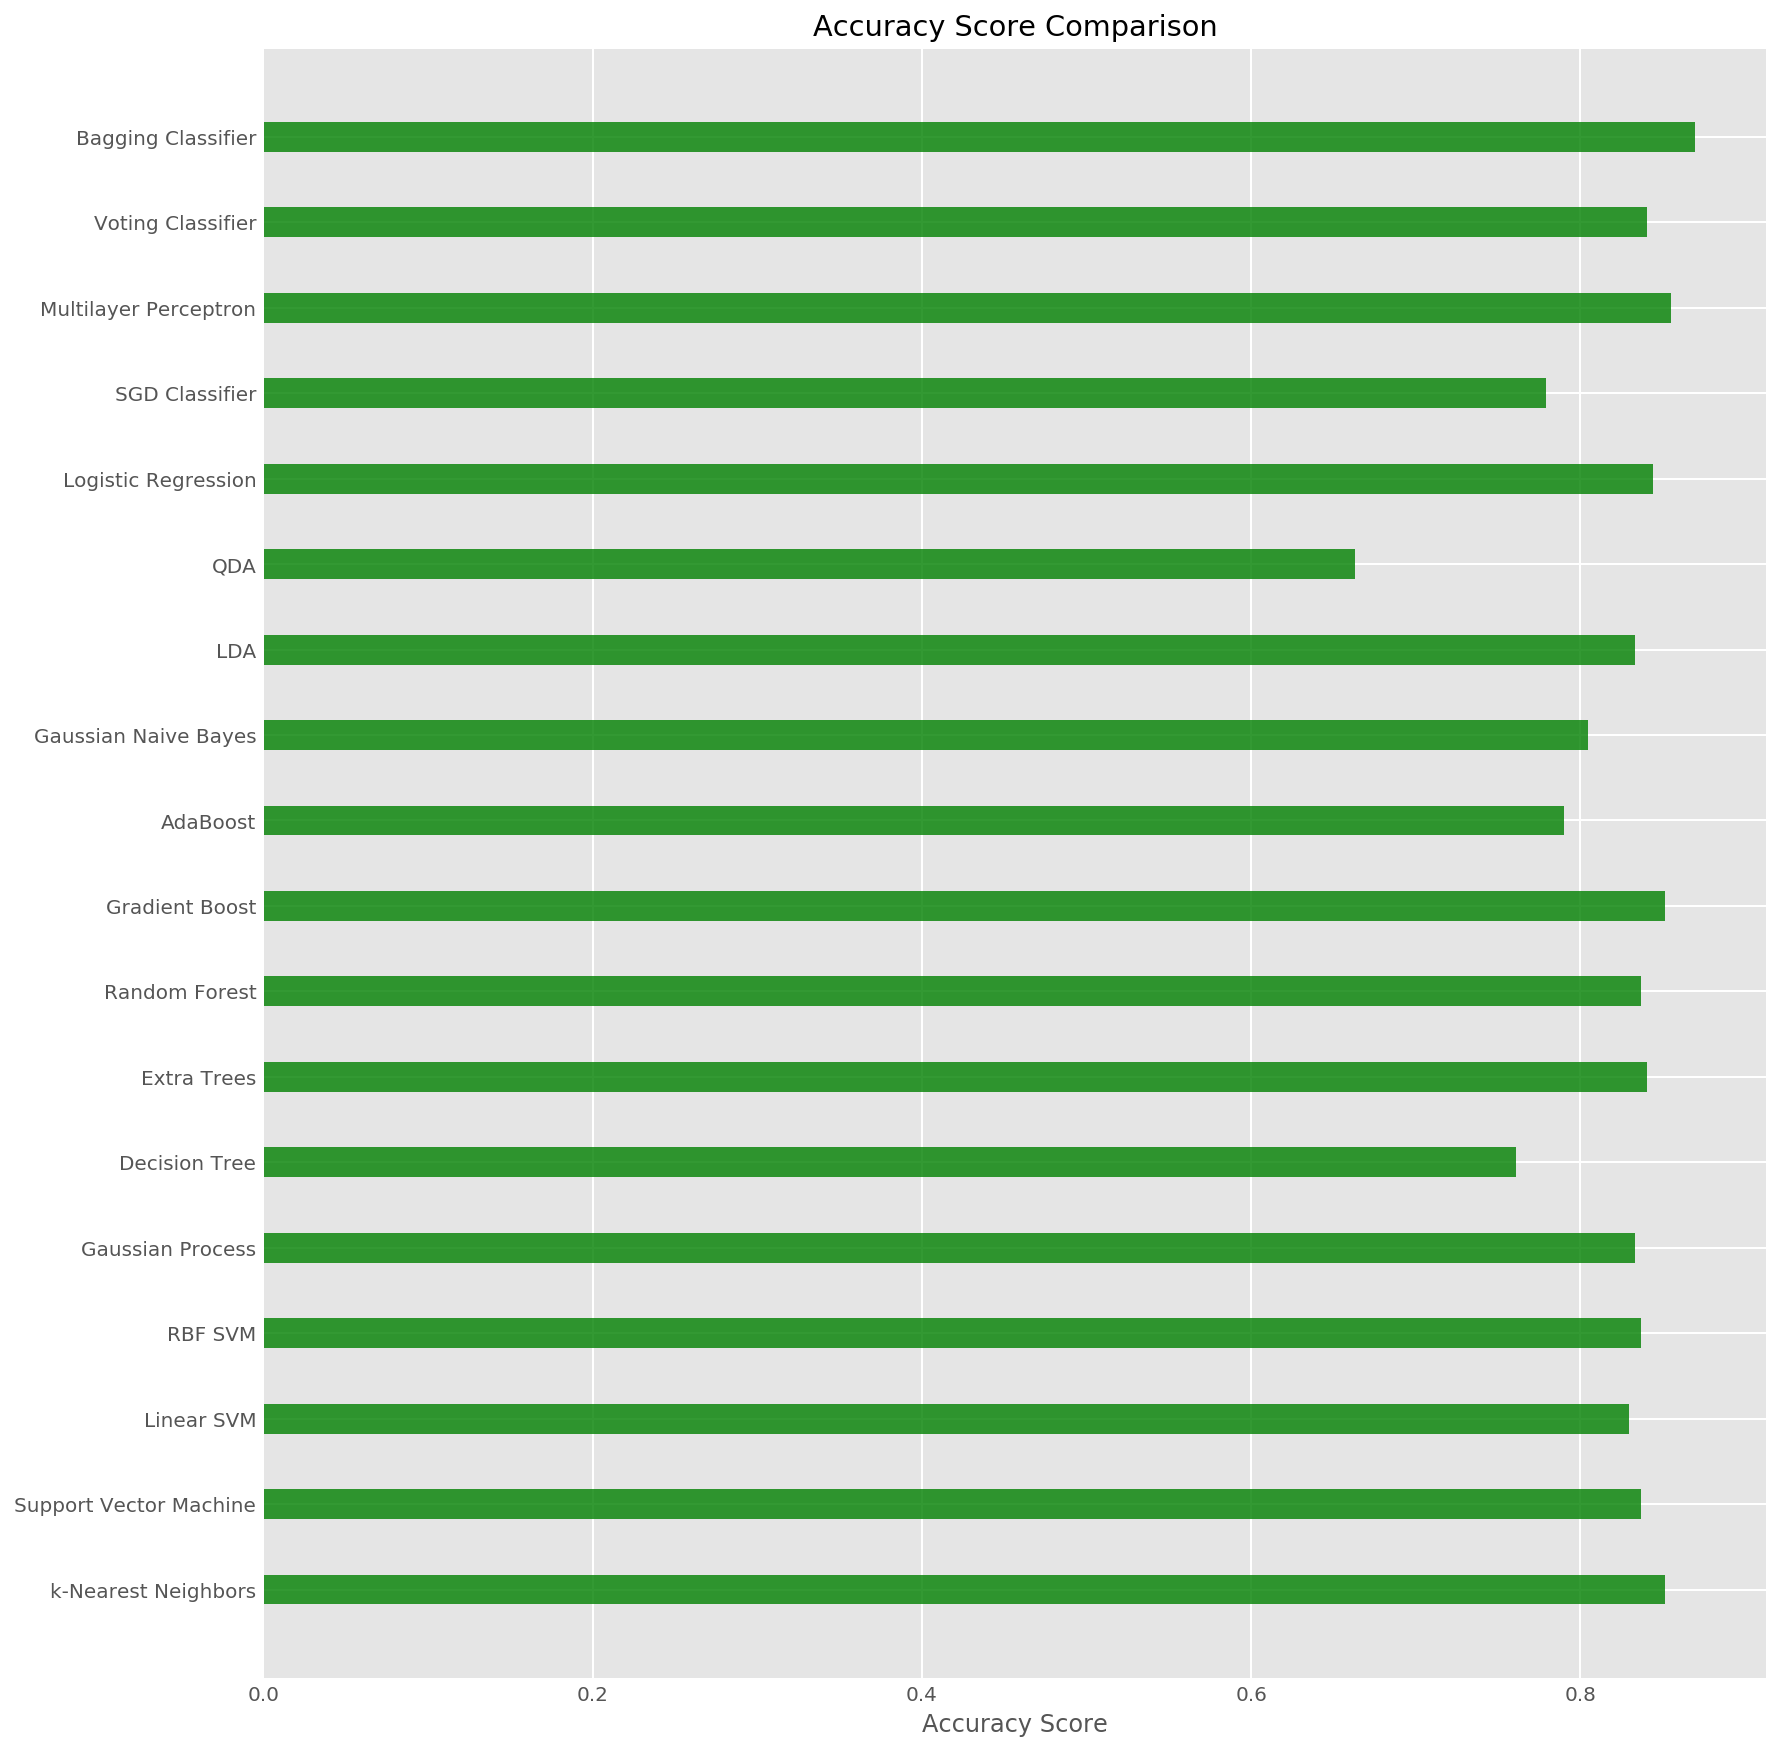

In [43]:
fig = plt.figure(figsize=(12,15))
index = models_names
bar_width = 0.35
y_pos = np.arange(len(index))

plt.barh(y_pos, models_df.AccuracyScore, bar_width, align='center', alpha=0.8, color=['green'])
plt.yticks(y_pos, index)
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score Comparison')
 
plt.show();

- From the modelling above the best models that are giving the best prediction are ** Bagging Classifier, RBF SVM, Multilayer Perceptron, Support Vector Machine, Gradient Boost, Logistic Regression **

### Improving the Modelling & Accuracy Score

** How to Have a Better Prediction & Increase the Accuracy Score **

1. Check the correlation
    - See the relationship between the pred_attribute and other columns 
    - Pick the highest 5 scores, which are the most related columns to our prediction. 
2. Do the modelling in GridSearch
    - Check the feature importance and pick the highest 5 scores. Again, this will give us the most related five columns to our prediction. 
3. Model the new data frame with most related features & compare the scores

** Finding the Most Related Columns ** 

In [45]:
df_update = df.copy()
df_update['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)
df_update.head()

,subject_id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute,origin
0,0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,Cleveland
1,1,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0,Cleveland
2,2,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0.0,Cleveland
3,3,48.0,0.0,3.0,130.0,275.0,0.0,0.0,139.0,0.0,0.2,1.0,0.0,3.0,0.0,Cleveland
4,4,58.0,0.0,1.0,150.0,283.0,1.0,2.0,162.0,0.0,1.0,1.0,0.0,3.0,0.0,Cleveland


In [46]:
df_update.corr()[['pred_attribute']].sort_values('pred_attribute',ascending=False)

,pred_attribute
pred_attribute,1.000000
subject_id,0.751197
cp,0.471712
exang,0.436162
slop,0.425163
oldpeak,0.395369
thal,0.354417
sex,0.307284
age,0.282700
ca,0.200564


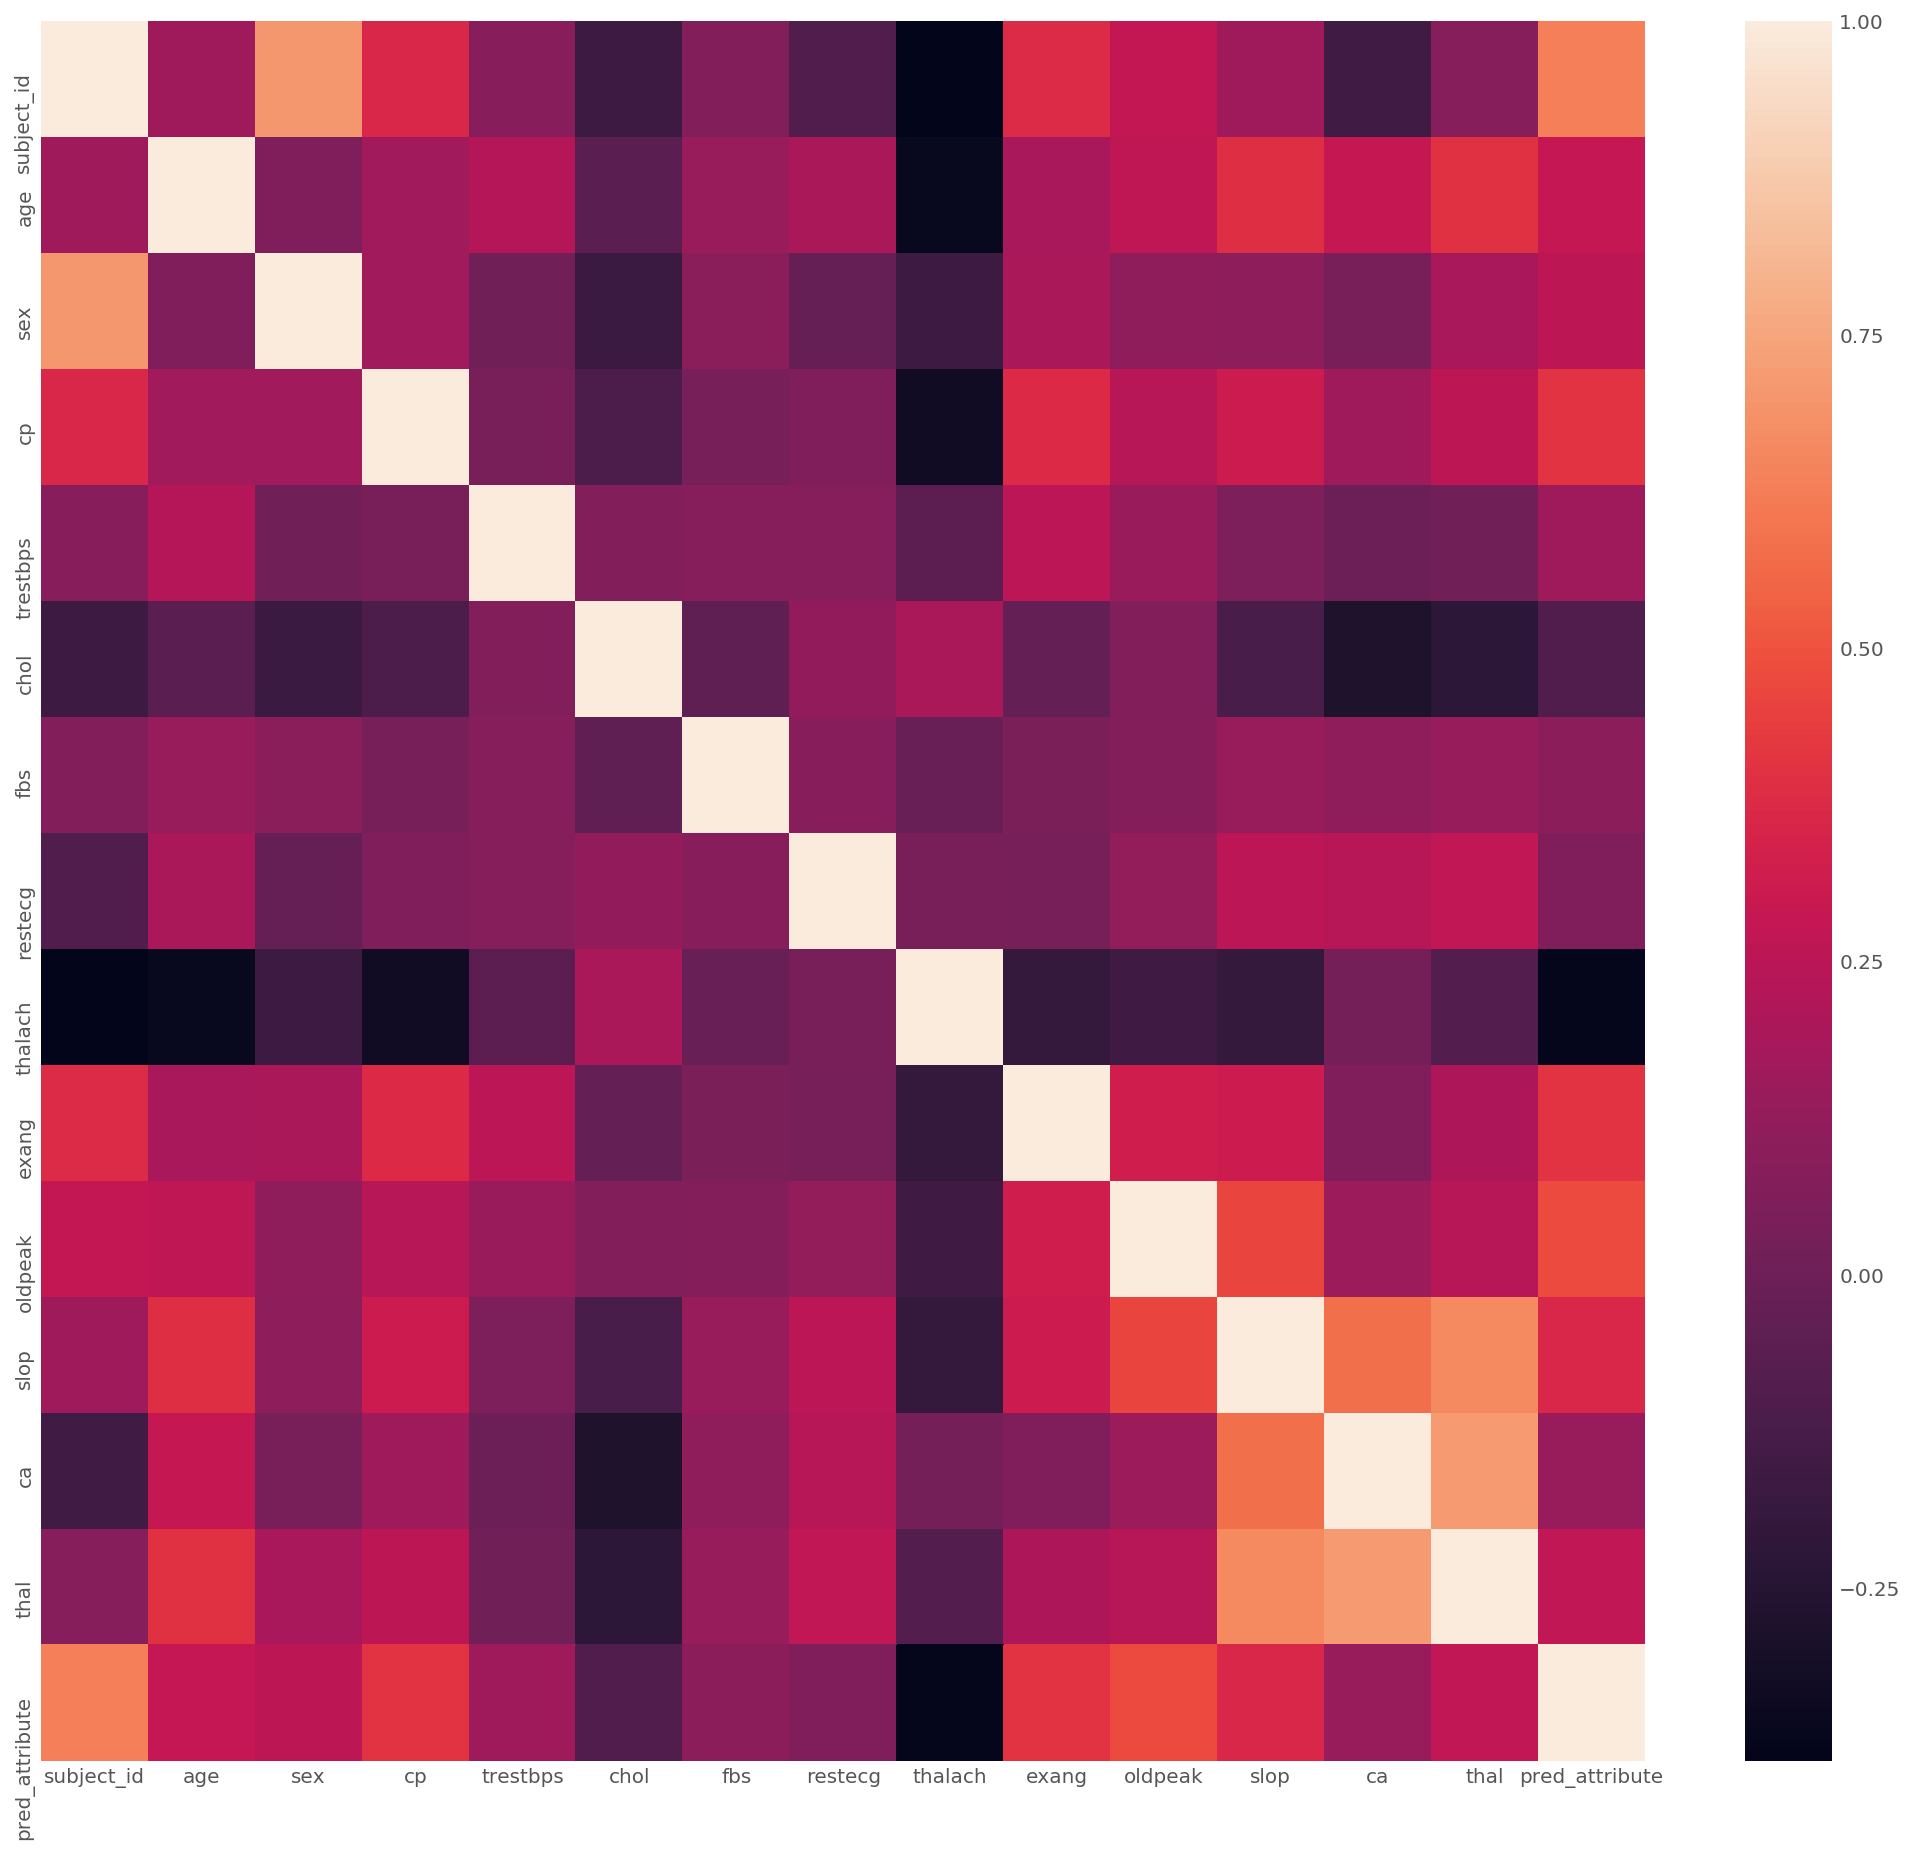

In [50]:
fig = plt.figure(figsize=(16,16))
sns.heatmap(df.corr());

- The graph above shows us the relationship between each model. Where we can see there isn't any high correlation between variables. The best correlated values with pred_attribute are **olpeak, cp, exang, slop, thalach(negative relationship)**. 

In [51]:
gs_rfc.best_estimator_.fit(Xs, y)
importance_rfc = pd.Series(gs_rfc.best_estimator_.feature_importances_, index=Xs.columns).sort_values(ascending=False)
print('RFC:',importance_rfc)

RFC: cp_4.0                0.101243
exang_1.0             0.078534
thal_7.0              0.077146
thalach               0.075852
exang_0.0             0.071418
age                   0.070932
chol                  0.067766
oldpeak               0.064508
trestbps              0.061591
slop_2.0              0.058658
origin_Switzerland    0.034196
sex_1.0               0.032333
cp_2.0                0.028247
ca_0.0                0.021872
cp_3.0                0.020544
origin_Hungarian      0.018657
thal_3.0              0.017278
slop_1.0              0.014249
restecg_0.0           0.011834
restecg_1.0           0.010760
ca_1.0                0.010463
restecg_2.0           0.009702
origin_LongBeach      0.009456
fbs_1.0               0.007832
fbs_0.0               0.007696
ca_2.0                0.007552
thal_6.0              0.005524
slop_3.0              0.002718
ca_3.0                0.001439
ca_9.0                0.000000
dtype: float64


- By checking the feature importance for rfc; **cp, exang, thal, thalach** are the most related columns.

In [52]:
gs_dtc.best_estimator_.fit(Xs, y)
importance_dtc = pd.Series(gs_dtc.best_estimator_.feature_importances_, index=Xs.columns).sort_values(ascending=False)
print('DTC:',importance_dtc)

DTC: cp_2.0                0.257541
exang_1.0             0.220917
origin_Switzerland    0.116456
thal_7.0              0.061155
oldpeak               0.055936
ca_0.0                0.040977
thalach               0.034873
cp_4.0                0.034837
trestbps              0.026532
chol                  0.024417
thal_3.0              0.022487
thal_6.0              0.021182
cp_3.0                0.018506
age                   0.017476
sex_1.0               0.012468
origin_Hungarian      0.009059
slop_1.0              0.007628
restecg_2.0           0.007580
ca_9.0                0.005622
origin_LongBeach      0.002485
restecg_1.0           0.001167
slop_2.0              0.000699
restecg_0.0           0.000000
fbs_1.0               0.000000
fbs_0.0               0.000000
slop_3.0              0.000000
ca_1.0                0.000000
ca_2.0                0.000000
ca_3.0                0.000000
exang_0.0             0.000000
dtype: float64


- By checking the feature importance for dtc; **cp, exang, thal, oldpeak, ca, thalach** are the most related columns.

- Above I compared the features for each best model from grid search and checked the relationship by looking at the correlation. The highest importance is the higher relationship between the pred_attribute. As a result **oldpeak, exang, slop, cp, thalach, chol** values are the ones that are most related to y (pred_attribute). Next step I am using these columns as my X value to predict the heart disease.  



** Modelling with Most Related Columns ** 

** Defining X & y **

In [53]:
related_df = df[['oldpeak', 'exang', 'slop', 'cp', 'thalach', 'chol', 'pred_attribute']]
X = related_df[['oldpeak', 'exang', 'slop', 'cp', 'thalach', 'chol']]
y = related_df[['pred_attribute']]

y['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)
y = y.pred_attribute

#Dummy the categorical values
X_dum = pd.get_dummies(X, columns = ['exang','slop','cp'], drop_first=True)

#Standardize the X
Xs = scaler.fit_transform(X_dum)
Xs = pd.DataFrame(Xs, columns = X_dum.columns)

#Train&Test Split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=random_state)

** Comparing the CV & Fitted Train/Test Scores **

In [54]:
cv_train = []
cv_test = []
train = []
test = []
for model in models:
    cv_test.append(cross_val_score(model, X_test, y_test, cv=5).mean())
    cv_train.append(cross_val_score(model, X_train, y_train, cv=5).mean())
    model.fit(X_train,y_train)
    train.append(model.score(X_train, y_train))
    test.append(model.score(X_test, y_test))
    
scores_df = pd.DataFrame(cv_train, index=models_names)   
scores_df.columns=['CV Train Score']
scores_df['CV Test Score'] = cv_test
scores_df['Training Data Accuracy Score'] = train
scores_df['Testing Data Accuracy Score'] = test
scores_df['Train-Test Difference'] = scores_df['Training Data Accuracy Score'] - scores_df['Testing Data Accuracy Score']
scores_df.sort_values('Train-Test Difference', ascending=False)

,CV Train Score,CV Test Score,Training Data Accuracy Score,Testing Data Accuracy Score,Train-Test Difference
AdaBoost,0.718684,0.736111,1.000000,0.710145,0.289855
Decision Tree,0.715535,0.732407,1.000000,0.713768,0.286232
Extra Trees,0.784044,0.808069,1.000000,0.797101,0.202899
Random Forest,0.780883,0.815212,0.987578,0.793478,0.194099
Gradient Boost,0.819667,0.779233,0.923913,0.818841,0.105072
k-Nearest Neighbors,0.804211,0.833466,0.880435,0.789855,0.090580
Gaussian Process,0.801074,0.804497,0.895963,0.822464,0.073499
Voting Classifier,0.818129,0.800926,0.874224,0.815217,0.059006
Bagging Classifier,0.788683,0.822751,0.855590,0.797101,0.058489
Linear SVM,0.825845,0.793651,0.826087,0.800725,0.025362


**Comparing the Accuracy Scores**

In [55]:
df_copy=[]
for model in models:
    model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    df_copy.append(metrics.accuracy_score(pred_test, y_test))
    
models_df2 = pd.DataFrame(df_copy, index=models_names)  
models_df2.columns = ['NewAccuracyScore']  

models_df2 = models_df2.merge(models_df, left_index=True, right_index=True, how='left')
models_df2['Difference'] = models_df2['NewAccuracyScore'] - models_df2['AccuracyScore']
models_df2.sort_values('NewAccuracyScore',ascending=False)

,NewAccuracyScore,AccuracyScore,Difference
Multilayer Perceptron,0.833333,0.855072,-0.021739
RBF SVM,0.826087,0.836957,-0.010870
Support Vector Machine,0.826087,0.836957,-0.010870
Logistic Regression,0.826087,0.844203,-0.018116
Gaussian Process,0.822464,0.833333,-0.010870
Voting Classifier,0.822464,0.840580,-0.018116
Gradient Boost,0.818841,0.851449,-0.032609
Gaussian Naive Bayes,0.818841,0.804348,0.014493
LDA,0.818841,0.833333,-0.014493
Linear SVM,0.800725,0.829710,-0.028986


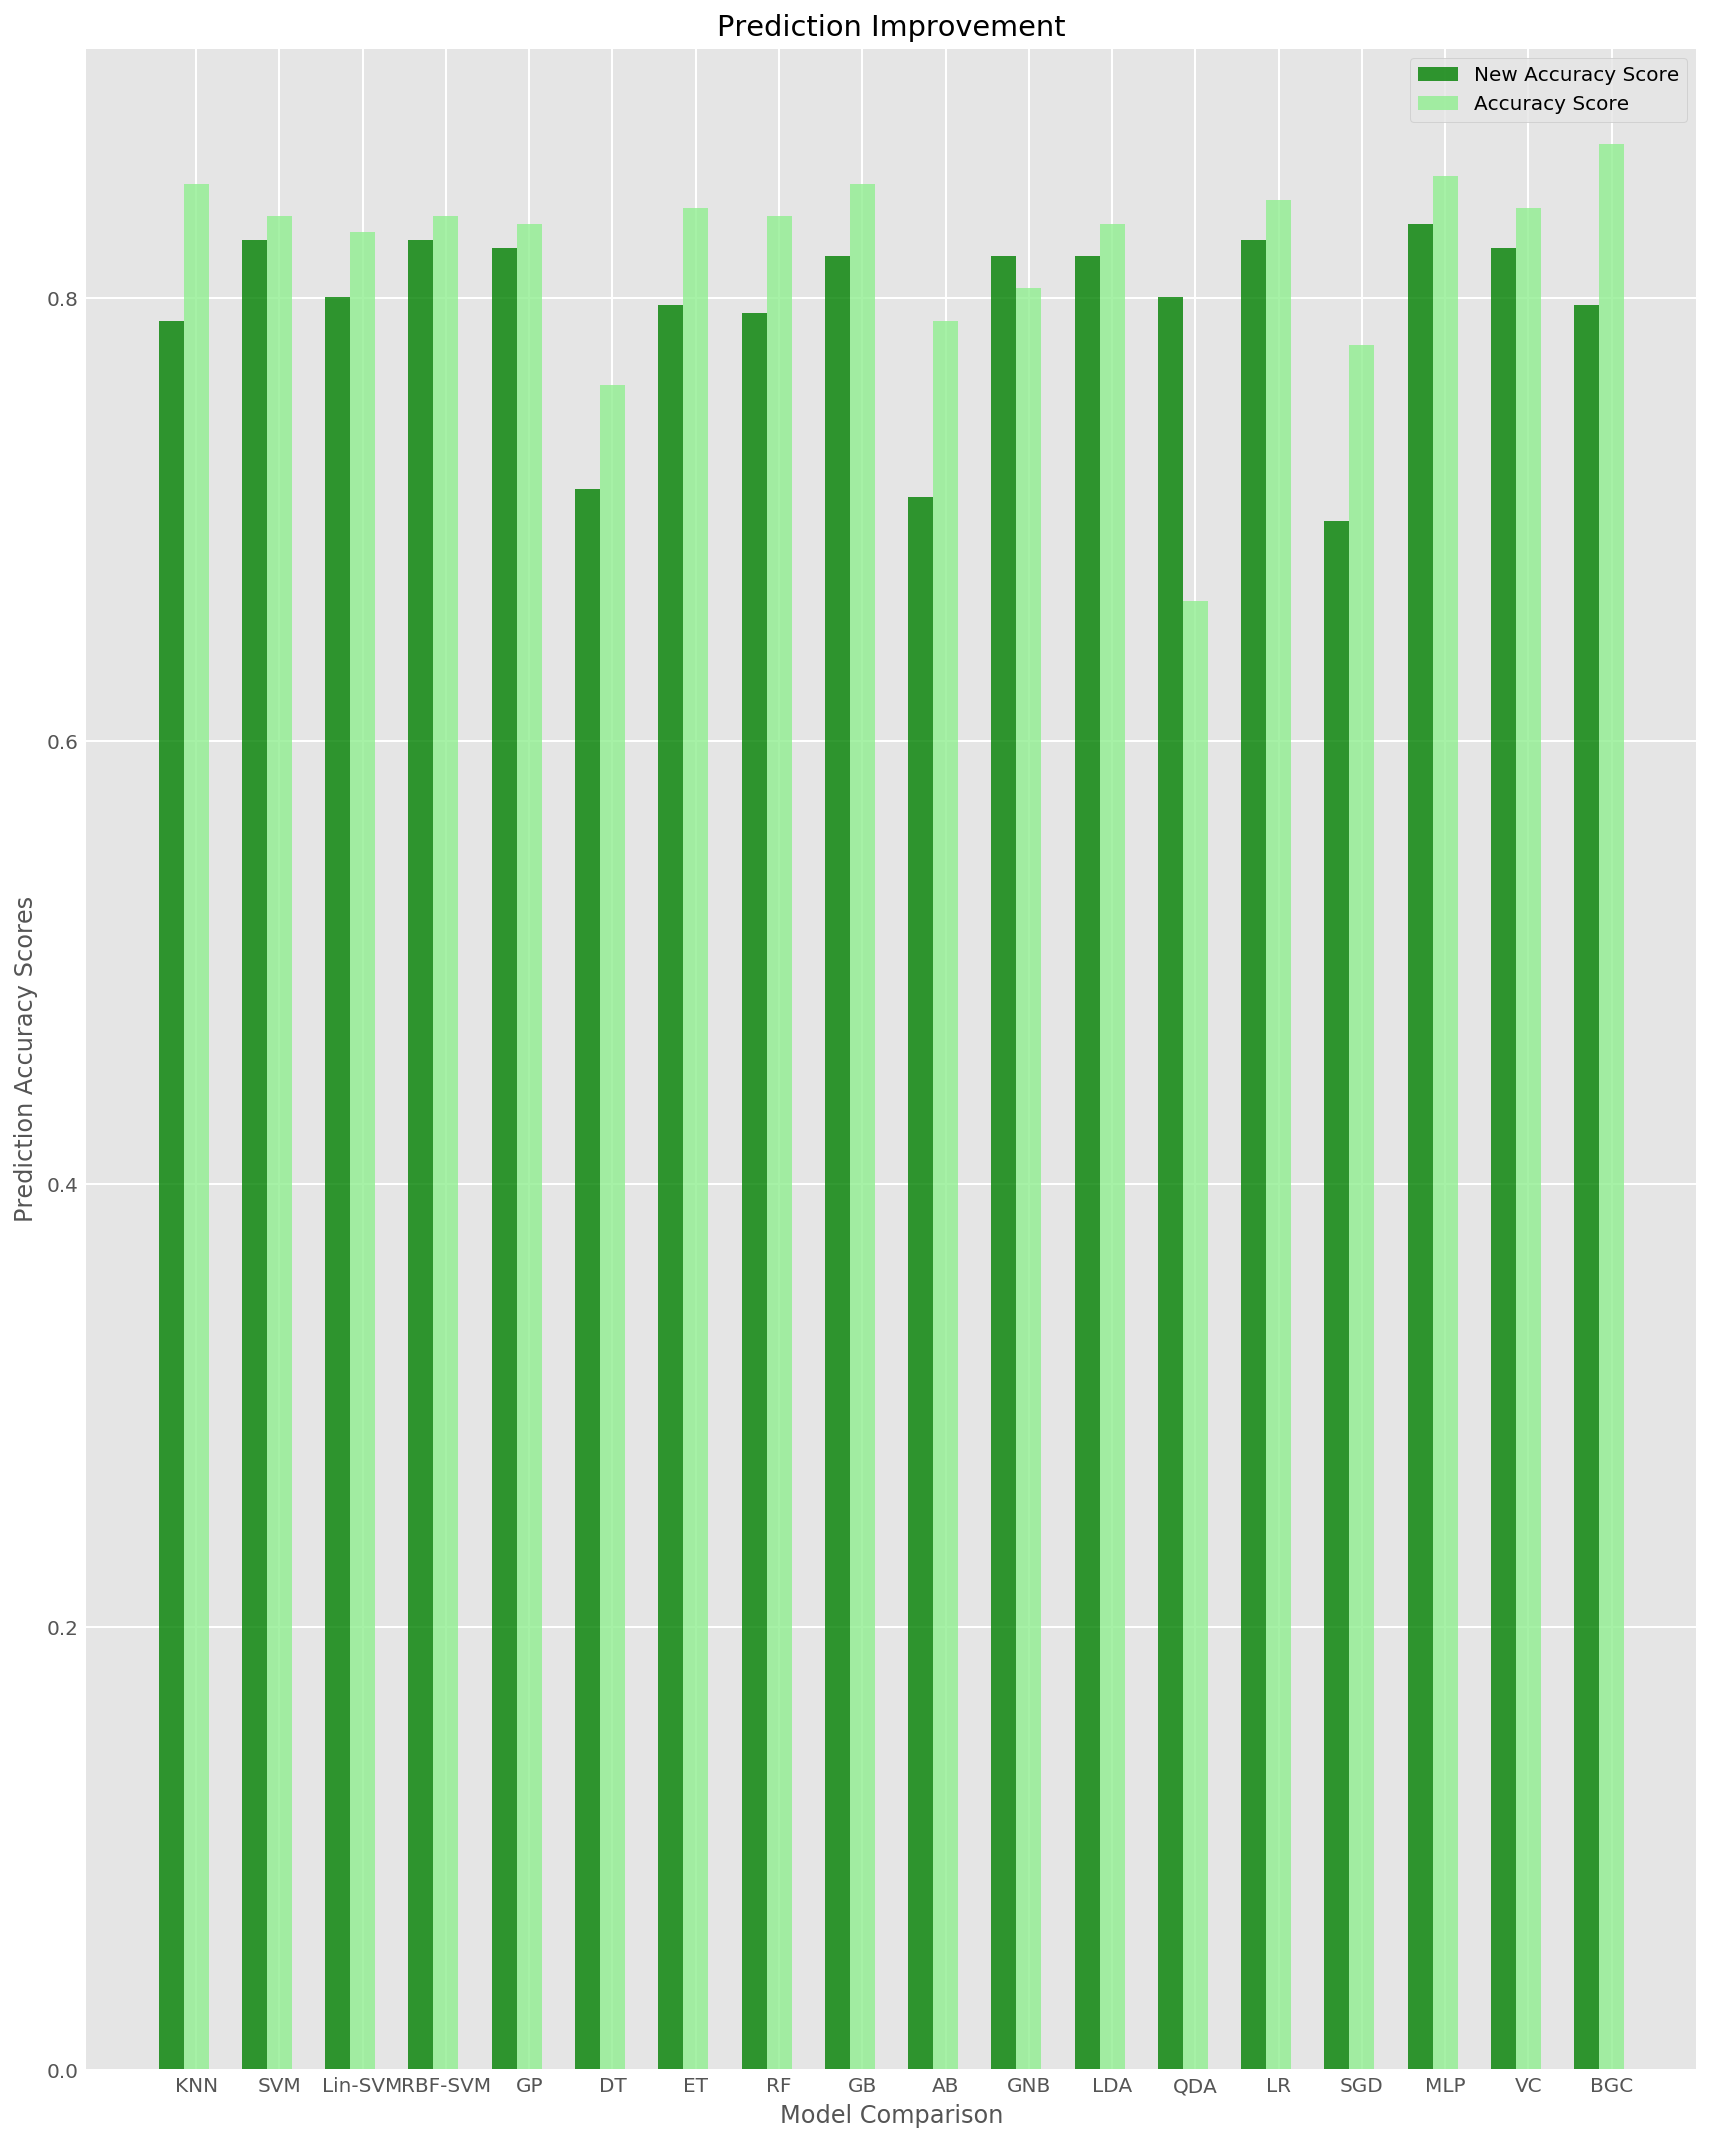

In [56]:
n_groups = 18

x_name = ['KNN', 'SVM', 'Lin-SVM', 'RBF-SVM', 'GP', 'DT', 'ET','RF', 'GB', 'AB', 'GNB','LDA', 'QDA', 'LR', 'SGD',
          'MLP', 'VC', 'BGC']

index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
fig = plt.figure(figsize=(12,15))

rects1 = plt.bar(index, models_df2.NewAccuracyScore, bar_width, 
                 alpha=opacity, color='green', label='New Accuracy Score')
rects2 = plt.bar(index + bar_width, models_df2.AccuracyScore, bar_width,  
                alpha=opacity, color='lightgreen', label='Accuracy Score')

plt.xlabel('Model Comparison')
plt.ylabel('Prediction Accuracy Scores')
plt.title('Prediction Improvement')
plt.xticks(index + bar_width, x_name)
plt.legend()
 
plt.tight_layout()
plt.show();

Data Frame above shows us the accuracy differences. As we can see most of the scores have been decreased. While each different model has its own method where it takes different columns and predict accordingly. 
- The correlation between columns are not very high, thus when we choose the most related columns the scores don't change that much, mostly they decrease. So I am proceeding my analysis by having all the columns to predict the disease. 

While the accuracy scores have been decreased I chose the best model by comparing the old scores where I used every column. 

Next step I did grid search on the models with highest score, to see if I can increase the accuracy by changing the parameters in the best models. These models are 
- Logistic Regression 
- Multilayer Perceptron 
- RBF SVM 
- Gradient Boost 
- Support Vector Machine 
- Bagging Classifier

### Model Selection

Choose the best 6 models and continue analysis
    - Change the parameters and see the change
    - Pick the best model 

From the analysis from previous section, I picked **Bagging Classifier, Multilayer Perceptron, RBF SVM, Gradient Boost, Support Vector Machine, Logistic Regression** models as my best models. In this section I am trying to improve these best models by changing their parameter using Grid Search. At the end I will compare my accuracy scores with the previous one's and pick my best model. 

- Support Vector Machine and RBF SVM are going to be in the same Grid Search model, while they are both Support Vector Machine with different kernels. Grid Search will show the best kernel. 

** Define Values **

In [57]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 
        'slop', 'ca', 'thal','origin']]
y = df[['pred_attribute']]

y['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)
y = y.pred_attribute

#baseline
print('Baseline:', y.value_counts(normalize=True))

#get dummies for categorical variables
X_dumm = pd.get_dummies(X, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slop', 'ca', 'thal', 'origin'], 
                        drop_first = True)

#standardize the X
Xs = scaler.fit_transform(X_dumm)
Xs = pd.DataFrame(Xs, columns=X_dumm.columns)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3, random_state=random_state)

Baseline: 1.0    0.553261
0.0    0.446739
Name: pred_attribute, dtype: float64


** Grid Search Function **

** Models **

In [58]:
#Best Models
model_SVC = SVC(kernel="linear",random_state=random_state, probability=True)
model_MLP = MLPClassifier(hidden_layer_sizes=(100,), momentum=0.9, random_state=random_state)
model_BGC = BaggingClassifier(KNeighborsClassifier(),random_state=random_state)
model_LR = LogisticRegression(random_state=random_state)
model_GBC = GradientBoostingClassifier(random_state=random_state)

** Parameters for GridSearch **

In [59]:
params_SVC = {'kernel' : ['linear','rbf','poly','sigmoid'] , 'gamma' : [1e-1, 1e-2, 1e-3, 1e-4],
              'C': [1, 10, 100, 1000] }

params_MLP = {'solver': ['sgd','lbfgs'], 'max_iter': np.arange(1000,2000,100), 
              'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 28)}

params_BGC = {'base_estimator':[None, Perceptron(),KNeighborsClassifier(),SVC()], 
              'n_estimators':np.arange(10,100,10), 'max_samples': np.linspace(0.8, 1.0, 3), 
              'max_features':range(int(3/4.*X_train.shape[1]), X_train.shape[1]+1), 'bootstrap': ['True','False']}

params_LR = {'penalty' : ['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

params_GBC = { 'learning_rate' : [0.01, 0.05, 0.075, 0.1, 0.2], 'max_depth' :[3,5,8],
              'min_samples_split' : np.linspace(0.1, 0.5, 12), 'min_samples_leaf' : np.linspace(0.1, 0.5, 12), 
              'max_features' :['log2','sqrt'], 'criterion' : ['friedman_mse',  'mae'], 
              'subsample':[0.5, 0.75, 0.9, 1.0] }


In [60]:
#Grid Search
gs_SVC = grid_search_func_tt(model_SVC, params_SVC, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_MLP = grid_search_func_tt(model_MLP, params_MLP, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_BGC = grid_search_func_tt(model_BGC, params_BGC, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_LR = grid_search_func_tt(model_LR, params_LR, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)
gs_GBC = grid_search_func_tt(model_GBC, params_GBC, X_train, X_test, y_train, y_test, scoring_function=metrics.r2_score, 
                     scoring='r2',cv=5)


Best score
0.41674540521915837

Best estimator
{'C': 1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Test score:  0.40785239219051705
Best score
0.4605144602271725

Best estimator
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

Test score:  0.39304870199527997
Best score
0.4604703851395926

Best estimator
{'base_estimator__C': 1.0, 'base_estimator__cache_size': 200, 'base_estimator__class

In [63]:
#Comparing the CV, Test & Train Scores
cv_train = []
cv_test = []
train = []
test = []
gs_models =[gs_SVC.best_estimator_,gs_MLP.best_estimator_, gs_BGC.best_estimator_,
            gs_LR.best_estimator_, gs_GBC.best_estimator_]
for model in gs_models:
    cv_test.append(cross_val_score(model, X_test, y_test, cv=5).mean())
    cv_train.append(cross_val_score(model, X_train, y_train, cv=5).mean())
    model.fit(X_train,y_train)
    train.append(model.score(X_train, y_train))
    test.append(model.score(X_test, y_test))
    
scores_df = pd.DataFrame(cv_train, index=['SVC','MLP','BGC','LR', 'GBC'])   
scores_df.columns=['CV Train Score']
scores_df['CV Test Score'] = cv_test
scores_df['Training Data Accuracy Score'] = train
scores_df['Testing Data Accuracy Score'] = test
scores_df['Train-Test Difference'] = scores_df['Training Data Accuracy Score'] - scores_df['Testing Data Accuracy Score']
scores_df.sort_values('CV Train Score', ascending=False)

,CV Train Score,CV Test Score,Training Data Accuracy Score,Testing Data Accuracy Score,Train-Test Difference
MLP,0.866241,0.844180,0.892857,0.851449,0.041408
BGC,0.866217,0.833730,0.908385,0.869565,0.038820
GBC,0.863200,0.847751,0.922360,0.844203,0.078157
SVC,0.855376,0.848148,0.877329,0.855072,0.022257
LR,0.853777,0.822751,0.863354,0.844203,0.019151


- Here I used Grid Search to analyse different parameters for each model and have a better score. 
- Score_Compare function shows the difference between train and test scores. Here the train & test scores are close each other, which shows there isn't overfitting at the dataset, and the model is training the data well while the test scores are close to the train scores. 
- Above we can see that overall the models are not overfitting the data. 
- When we check the CV_Train scores it will give us the correct accuracy scores on a not overfitted, regularized dataset. As a result the highest scored model is **BGC Model**.


** Accuracy Scores **

In [64]:
y_pred_class_SVC = gs_SVC.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class_SVC))

0.8773291925465838


In [65]:
y_pred_class_MLP = gs_MLP.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class_MLP))

0.8928571428571429


In [66]:
y_pred_class_BGC = gs_BGC.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class_BGC))

0.9083850931677019


In [67]:
y_pred_class_LR = gs_LR.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class_LR))

0.8633540372670807


In [68]:
y_pred_class_GBC = gs_GBC.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_class_GBC))

0.922360248447205


- When we compare the accuracy scores with the baseline, if the scores are higher than the baseline the model is working well, then we can choose the highest score as our best model. In this case baseline is 0.55 and models have higher score than the baseline.

** Confusion Matrix & ROC, AUC, Precision, Recall Scores **

In [69]:
from sklearn.metrics import auc, precision_score, recall_score

**SVC**

In [70]:
print(confusion_matrix(y_train, y_pred_class_SVC))

[[255  38]
 [ 41 310]]


In [155]:
#False Negative Rate
41/644

0.06366459627329192

In [73]:
prob_SVC = pd.DataFrame(gs_SVC.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [74]:
fpr_SVC, tpr_SVC, threshold_SVC = roc_curve(y_train, prob_SVC.class_1)

**MLP**

In [75]:
print(confusion_matrix(y_train, y_pred_class_MLP))

[[258  35]
 [ 34 317]]


In [154]:
#False Negative Rate
34/644

0.052795031055900624

In [77]:
prob_MLP = pd.DataFrame(gs_MLP.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [78]:
fpr_MLP, tpr_MLP, threshold_MLP = roc_curve(y_train, prob_MLP.class_1)

**GBC**

In [79]:
print(confusion_matrix(y_train, y_pred_class_GBC))

[[268  25]
 [ 25 326]]


In [81]:
#False Negative Rate
25/644

0.03881987577639751

In [82]:
prob_GBC = pd.DataFrame(gs_GBC.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [83]:
fpr_GBC, tpr_GBC, threshold_GBC = roc_curve(y_train, prob_GBC.class_1)

**BGC**

In [84]:
print(confusion_matrix(y_train, y_pred_class_BGC))

[[263  30]
 [ 29 322]]


In [153]:
#False Negative Rate
29/644

0.04503105590062112

In [86]:
prob_BGC = pd.DataFrame(gs_BGC.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [87]:
fpr_BGC, tpr_BGC, threshold_BGC = roc_curve(y_train, prob_BGC.class_1)

**LR**

In [88]:
print(confusion_matrix(y_train, y_pred_class_LR))

[[251  42]
 [ 46 305]]


In [156]:
#False Negative Rate
46/644

0.07142857142857142

In [90]:
prob_LR = pd.DataFrame(gs_LR.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

In [91]:
fpr_LR, tpr_LR, threshold_LR = roc_curve(y_train, prob_LR.class_1)

In [92]:
#Data Frame of all the scores for each model
df_scores = pd.DataFrame({'CV Train Score' : [cross_val_score(gs_SVC.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_MLP.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_GBC.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_BGC.best_estimator_, X_train, y_train, cv=5).mean(),
                                             cross_val_score(gs_LR.best_estimator_, X_train, y_train, cv=5).mean()] ,
                          
                          'AccuracyScore': [metrics.accuracy_score(y_train, y_pred_class_SVC),
                                            metrics.accuracy_score(y_train, y_pred_class_MLP), 
                                            metrics.accuracy_score(y_train, y_pred_class_GBC),
                                            metrics.accuracy_score(y_train, y_pred_class_BGC),
                                            metrics.accuracy_score(y_train, y_pred_class_LR)],
                          
                          'ROCScore' : [roc_auc_score(y_train,prob_SVC.class_1),
                                        roc_auc_score(y_train,prob_MLP.class_1), 
                                        roc_auc_score(y_train,prob_GBC.class_1), 
                                        roc_auc_score(y_train,prob_BGC.class_1),
                                        roc_auc_score(y_train,prob_LR.class_1)],
                          
                          'AUCScore' : [auc(fpr_SVC,tpr_SVC), auc(fpr_MLP,tpr_MLP), auc(fpr_GBC,tpr_GBC), 
                                        auc(fpr_BGC,tpr_BGC), auc(fpr_LR,tpr_LR)],
                          
                          'PrecisionScore' : [precision_score(y_train,y_pred_class_SVC), 
                                              precision_score(y_train,y_pred_class_MLP), 
                                              precision_score(y_train,y_pred_class_GBC), 
                                              precision_score(y_train,y_pred_class_BGC),
                                              precision_score(y_train,y_pred_class_LR)], 
                         
                          'RecallScore' : [recall_score(y_train,y_pred_class_SVC),
                                           recall_score(y_train,y_pred_class_MLP),
                                           recall_score(y_train,y_pred_class_GBC),
                                           recall_score(y_train,y_pred_class_BGC),
                                           recall_score(y_train,y_pred_class_LR)]}, 
                         index = ['SVC','MLP','GBC','BGC','LR'])

df_scores

,CV Train Score,AccuracyScore,ROCScore,AUCScore,PrecisionScore,RecallScore
SVC,0.855376,0.877329,0.939568,0.939568,0.890805,0.883191
MLP,0.866241,0.892857,0.955583,0.955583,0.900568,0.903134
GBC,0.863200,0.922360,0.973027,0.973027,0.928775,0.928775
BGC,0.866217,0.908385,0.962516,0.962516,0.914773,0.917379
LR,0.853777,0.863354,0.931984,0.931984,0.878963,0.868946


- After all the analysis and modelling, **MLP, GBC, BGC** have the highest CV Train Scores. While they have similar scores I checked their Accuracy, Precision and Recall Scores as well, and as a result I concluded that **GBC** model gives us the best heart disease prediction. But while GBC model may overfit the data, I decided to pick **BGC** as my best model.
- Next section I used the best model on a different data frame where I didn't predict the missing values and dropped them. This is showing me if predicting missing values increase or decrease the prediction accuracy.
- Additionally **BGC**'s false negative score is 0.04 (diagnosing the subject as healthy but the subject is diseased).

In [110]:
tp = np.sum((y_train == 1) & (y_pred_class_BGC == 1))
fp = np.sum((y_train == 0) & (y_pred_class_BGC == 1))
tn = np.sum((y_train == 0) & (y_pred_class_BGC == 0))
fn = np.sum((y_train == 1) & (y_pred_class_BGC == 0))
print("tp:", tp)
print("fp:", fp)
print("tn:", tn) 
print("fn:", fn)
print("Number of classification errors:", fp+fn)

tp: 322
fp: 30
tn: 263
fn: 29
Number of classification errors: 59


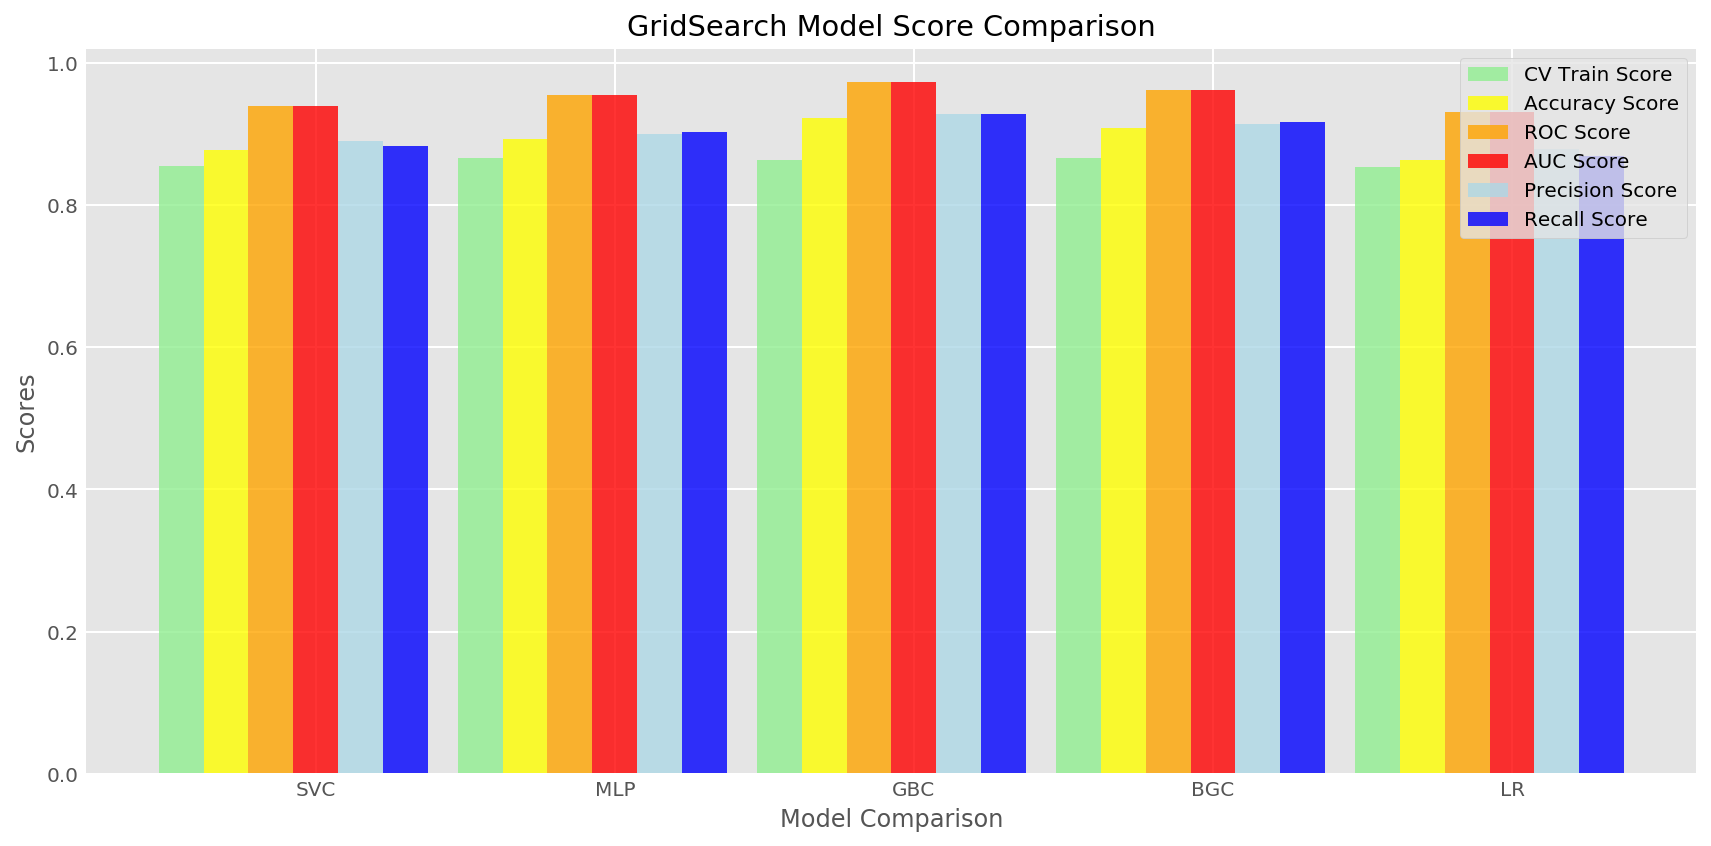

In [146]:
n_groups = 5

x_name = ['SVC','MLP','GBC','BGC','LR']

fig = plt.figure(figsize=(12,6))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, df_scores['CV Train Score'], bar_width, 
                 alpha=opacity, color='lightgreen', label='CV Train Score')
rects2 = plt.bar(index + bar_width, df_scores.AccuracyScore, bar_width,  
                alpha=opacity, color='yellow', label='Accuracy Score')
rects3 = plt.bar(index + bar_width*2, df_scores.ROCScore, bar_width, 
                 alpha=opacity, color='orange', label='ROC Score')
rects4 = plt.bar(index + bar_width*3, df_scores.AUCScore, bar_width,  
                alpha=opacity, color='red', label='AUC Score')
rects5 = plt.bar(index + bar_width*4, df_scores.PrecisionScore, bar_width, 
                 alpha=opacity, color='lightblue', label='Precision Score')
rects6 = plt.bar(index + bar_width*5, df_scores.RecallScore, bar_width,  
                alpha=opacity, color='blue', label='Recall Score')

plt.xlabel('Model Comparison')
plt.ylabel('Scores')
plt.title('GridSearch Model Score Comparison')
plt.xticks(index + bar_width*3, x_name)
plt.legend()
 
plt.tight_layout()
plt.show();

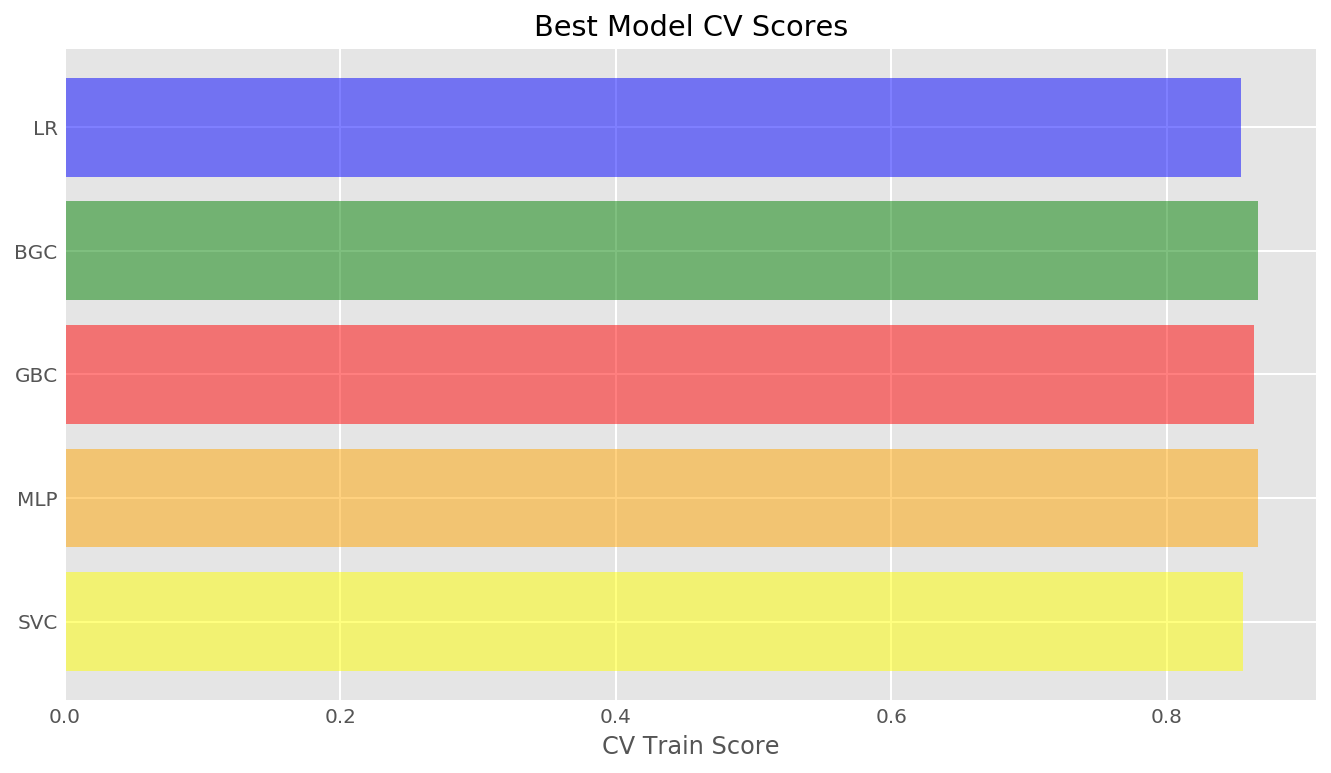

In [145]:
CV = [cross_val_score(gs_SVC.best_estimator_, X_train, y_train, cv=5).mean(),
      cross_val_score(gs_MLP.best_estimator_, X_train, y_train, cv=5).mean(),
      cross_val_score(gs_GBC.best_estimator_, X_train, y_train, cv=5).mean(),
      cross_val_score(gs_BGC.best_estimator_, X_train, y_train, cv=5).mean(),
      cross_val_score(gs_LR.best_estimator_, X_train, y_train, cv=5).mean()] 
fig = plt.figure(figsize=(10,6))
index = ['SVC','MLP','GBC','BGC','LR']
y_pos = np.arange(len(index))

plt.barh(y_pos, CV, align='center', alpha=0.5, color=['yellow', 'orange', 'red', 'green', 'blue'])
plt.yticks(y_pos, index)
plt.xlabel('CV Train Score')
plt.title('Best Model CV Scores')
 
plt.show();

In [147]:
best_models = [SVC(random_state=random_state),
               MLPClassifier(hidden_layer_sizes=(100,),momentum=0.9,solver='sgd',random_state=random_state),
               GradientBoostingClassifier(random_state=random_state),
               BaggingClassifier(KNeighborsClassifier(),random_state=random_state),
               LogisticRegression(random_state=random_state) ]

cv_train = []
for model in best_models:
    cv_train.append(cross_val_score(model, X_train, y_train, cv=5).mean())
    
scores_cv_train = pd.DataFrame(cv_train, index=index)   
scores_cv_train.columns=['CV Train Score']

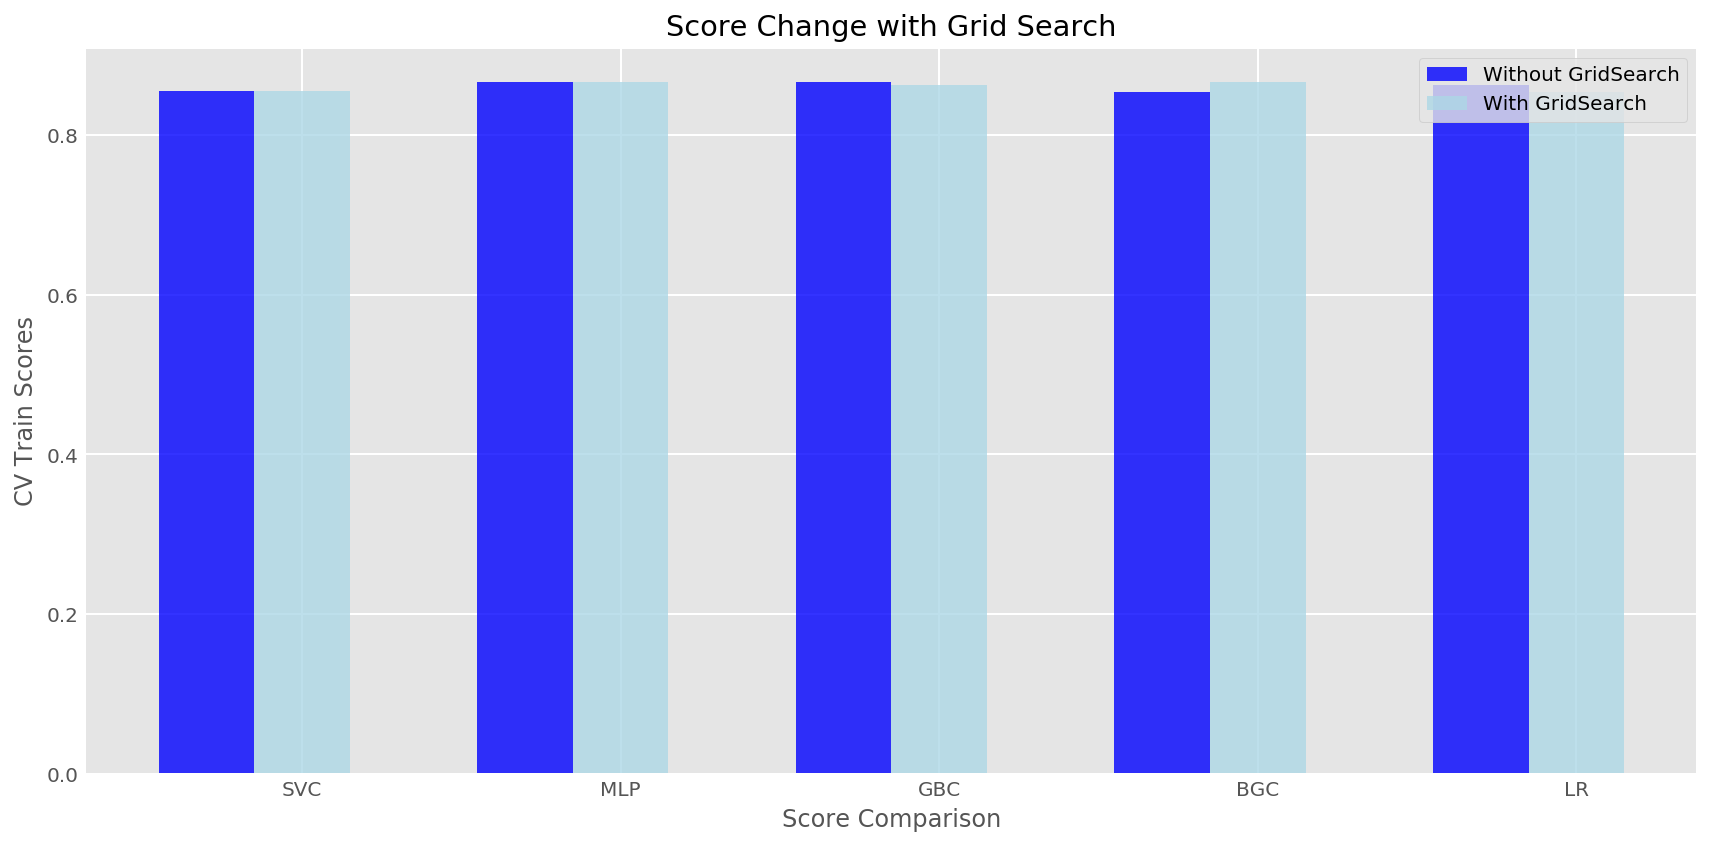

In [152]:
x_names = ['SVC','MLP','GBC','BGC','LR']
index = np.arange(n_groups)
fig = plt.figure(figsize=(12,6))
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, scores_df['CV Train Score'], bar_width, 
                 alpha=opacity, color='blue', label='Without GridSearch')
rects2 = plt.bar(index + bar_width, df_scores['CV Train Score'], bar_width,  
                alpha=opacity, color='lightblue', label='With GridSearch')

plt.xlabel('Score Comparison')
plt.ylabel('CV Train Scores')
plt.title('Score Change with Grid Search')
plt.xticks(index + bar_width, x_names)
plt.legend()
 
plt.tight_layout()
plt.show();

# 5. Comparison 

In this section I will use the selected best model and compare my result with another data frame. I will run the same model without predicting the null values (excluding the null values) and see if the model improved by predicting the missing values or not. 

This will help me to see the difference and importance of predicting null values. 

1. Define the new Data Frame 
    - Drop the null values
    - Define X&y values
2. Model the new Data Frame
3. Compare the scores dropped vs. predicted null values

### Dropping Null Values 

In [100]:
df_dropnull = pd.read_csv('../DSI7_Capstone_Final/Datasets/df_null.csv')

In [101]:
df_dropnull.isnull().sum()

subject_id          0
age                 0
sex                 0
cp                  0
trestbps           58
chol                7
fbs                82
restecg             1
thalach            54
exang              54
oldpeak            62
slop              119
ca                320
thal              220
pred_attribute      0
origin              0
dtype: int64

In [102]:
df_dropnull.dropna(inplace = True)

In [103]:
df_dropnull.isnull().sum()

subject_id        0
age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slop              0
ca                0
thal              0
pred_attribute    0
origin            0
dtype: int64

** Data Description **

In [104]:
df_dropnull.shape

(592, 16)

In [105]:
df_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 919
Data columns (total 16 columns):
subject_id        592 non-null float64
age               592 non-null float64
sex               592 non-null float64
cp                592 non-null float64
trestbps          592 non-null float64
chol              592 non-null float64
fbs               592 non-null float64
restecg           592 non-null float64
thalach           592 non-null float64
exang             592 non-null float64
oldpeak           592 non-null float64
slop              592 non-null float64
ca                592 non-null float64
thal              592 non-null float64
pred_attribute    592 non-null float64
origin            592 non-null object
dtypes: float64(15), object(1)
memory usage: 78.6+ KB


In [106]:
df_dropnull.describe()

,subject_id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,459.496622,51.209459,0.701014,3.072635,131.876689,238.743243,-0.015203,0.592905,144.099662,0.300676,0.823142,-1.748311,-4.054054,-1.391892,0.869932
std,323.076000,9.087656,0.458201,0.968083,18.590793,77.272465,1.096729,0.953123,24.629956,0.602420,1.070646,5.011914,4.908343,7.025345,1.236080
min,0.000000,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,148.750000,44.000000,0.000000,2.000000,120.000000,205.750000,0.000000,0.000000,127.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
50%,300.500000,52.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,146.000000,0.000000,0.200000,1.000000,0.000000,3.000000,0.000000
75%,771.250000,58.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,162.000000,1.000000,1.500000,2.000000,0.000000,6.000000,2.000000
max,919.000000,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,9.000000,7.000000,4.000000


In [107]:
df_dropnull.corr()[['pred_attribute']].sort_values('pred_attribute',ascending=False)

,pred_attribute
pred_attribute,1.000000
oldpeak,0.531729
cp,0.419386
exang,0.388910
slop,0.334136
age,0.223254
sex,0.221010
trestbps,0.185664
chol,0.164187
thal,0.138114


- By checking the correlation, we can see the relationship between columns. The pred_attribute is highly correlated with ** olpeak, cp, exang, slop, thalach(negative relationship) **. 
- In section 4, I also concluded that that pred_attribute is highly correlated with **oldpeak, exang, slop, cp, thalach(negative relationship)**. 
- The related feutures and relationship doesn't change even if we the drop the null values or predict them.

** Define X&y **

In [108]:
X = df_dropnull[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 
                    'exang', 'oldpeak', 'slop', 'ca', 'thal', 'origin']]
y = df_dropnull[['pred_attribute']]
y['pred_attribute'].replace(to_replace = [1,2,3,4], value = [1,1,1,1], inplace = True)
y = y.pred_attribute

#baseline
print('Baseline:', y.value_counts(normalize=True))

#get dummies for categorical variables
X_dumm = pd.get_dummies(X, columns = ['sex','cp','origin','restecg','exang','fbs','slop','thal','ca'], 
                        drop_first = True)

#standardize the X
Xs = scaler.fit_transform(X_dumm)
Xs = pd.DataFrame(Xs, columns=X_dumm.columns)

#train-test split
X_train_dn, X_test_dn, y_train_dn, y_test_dn = train_test_split(Xs, y, test_size = 0.3, random_state=random_state)

Baseline: 0.0    0.587838
1.0    0.412162
Name: pred_attribute, dtype: float64


### Modelling 

** Using the best model **

In [113]:
params_BGC = {'base_estimator':[None, Perceptron(),KNeighborsClassifier(),SVC()], 
              'n_estimators':np.arange(10,100,10), 'max_samples': np.linspace(0.8, 1.0, 3), 
              'bootstrap': ['True','False']}

In [114]:
gs_BGC_dn = grid_search_func_tt(model_BGC, params_BGC, X_train_dn, X_test_dn, y_train_dn, y_test_dn, 
                            scoring_function=metrics.r2_score, scoring='r2',cv=5)

Best score
0.24669467787114843

Best estimator
{'base_estimator__C': 1.0, 'base_estimator__cache_size': 200, 'base_estimator__class_weight': None, 'base_estimator__coef0': 0.0, 'base_estimator__decision_function_shape': 'ovr', 'base_estimator__degree': 3, 'base_estimator__gamma': 'auto_deprecated', 'base_estimator__kernel': 'rbf', 'base_estimator__max_iter': -1, 'base_estimator__probability': False, 'base_estimator__random_state': None, 'base_estimator__shrinking': True, 'base_estimator__tol': 0.001, 'base_estimator__verbose': False, 'base_estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False), 'bootstrap': 'True', 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}

Tes

** Scores ** 

In [115]:
score_compare(X_train_dn,X_test_dn,y_train_dn,y_test_dn,gs_BGC_dn.best_estimator_)

Model: BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
         bootstrap='True', bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

CV Test Score: 0.8649206349206349
CV Train Score: 0.8164560681751396
Training Data Accuracy Score: 0.8768115942028986
Test Data Accuracy Score: 0.8539325842696629



In [116]:
y_pred_class_BGC_dn = gs_BGC_dn.best_estimator_.predict(X_train_dn)
print(metrics.accuracy_score(y_train_dn, y_pred_class_BGC_dn))

0.8768115942028986


In [117]:
prob_BGC_dn = pd.DataFrame(gs_BGC_dn.best_estimator_.predict_proba(X_train_dn), columns=['class_0','class_1'])

In [118]:
print(confusion_matrix(y_train_dn, y_pred_class_BGC_dn))

[[224  16]
 [ 35 139]]


In [120]:
tp = np.sum((y_train_dn == 1) & (y_pred_class_BGC_dn == 1))
fp = np.sum((y_train_dn == 0) & (y_pred_class_BGC_dn == 1))
tn = np.sum((y_train_dn == 0) & (y_pred_class_BGC_dn == 0))
fn = np.sum((y_train_dn == 1) & (y_pred_class_BGC_dn == 0))
print("tp:", tp)
print("fp:", fp)
print("tn:", tn) 
print("fn:", fn)
print("Number of classification errors:", fp+fn)

tp: 139
fp: 16
tn: 224
fn: 35
Number of classification errors: 51


In [121]:
#False Positive Rate
16/414

0.03864734299516908

### Comparison of Dropped vs. Predicted Null Values 

In [122]:
fpr_BGC_dn, tpr_BGC_dn, threshold_BGC_dn = roc_curve(y_train_dn, prob_BGC_dn.class_1)
fpr_BGC, tpr_BGC, threshold_BGC = roc_curve(y_train, prob_BGC.class_1)

In [123]:
#Data Frame of all the scores for each model

df_scores_2 = pd.DataFrame({'CV_TrainScore' : [cross_val_score(gs_BGC.best_estimator_, X_train, y_train, cv=5).mean(),
                                               cross_val_score(gs_BGC_dn.best_estimator_, X_train_dn, y_train_dn, cv=5).mean(),],
                            'AccuracyScore' : [metrics.accuracy_score(y_train, y_pred_class_BGC), 
                                               metrics.accuracy_score(y_train_dn, y_pred_class_BGC_dn)],
                            'ROCScore' : [roc_auc_score(y_train,prob_BGC.class_1),
                                          roc_auc_score(y_train_dn,prob_BGC_dn.class_1)],
                            'AUCScore' : [auc(fpr_BGC,tpr_BGC), auc(fpr_BGC_dn,tpr_BGC_dn)],
                            'PrecisionScore' : [precision_score(y_train,y_pred_class_BGC), 
                                                precision_score(y_train_dn,y_pred_class_BGC_dn)],
                            'RecallScore' : [recall_score(y_train,y_pred_class_BGC),
                                             recall_score(y_train_dn,y_pred_class_BGC_dn)]}, 
                         index = ['PredictedNull','DroppedNull'])
df_scores_2

,CV_TrainScore,AccuracyScore,ROCScore,AUCScore,PrecisionScore,RecallScore
PredictedNull,0.866217,0.908385,0.962516,0.962516,0.914773,0.917379
DroppedNull,0.816456,0.876812,0.913853,0.913853,0.896774,0.798851


In [124]:
pd.DataFrame({'AccuracyScore':[metrics.accuracy_score(y_train, y_pred_class_BGC), 
                  metrics.accuracy_score(y_train_dn, y_pred_class_BGC_dn)]}, index = ['PredictedNull','DroppedNull'])

,AccuracyScore
PredictedNull,0.908385
DroppedNull,0.876812


The accuracy score of dropped missing value is **0.87** and the predicted one is **0.90**. Overall the analysis shows us **predicting the missing values** has better analysis than dropping the null values. 

For this classification model I want my recall and precision score to be as high as possible. A precision score of 1 indicates that the classifier never mistakenly classified the current class as another class. Precision score of 0 would mean that the classifier misclassified every instance of the current class. Which means the model will not mistakenly predict a sick person as healthy. In this case the recall and precision scores of predicted null values are higher than the dropped null values.

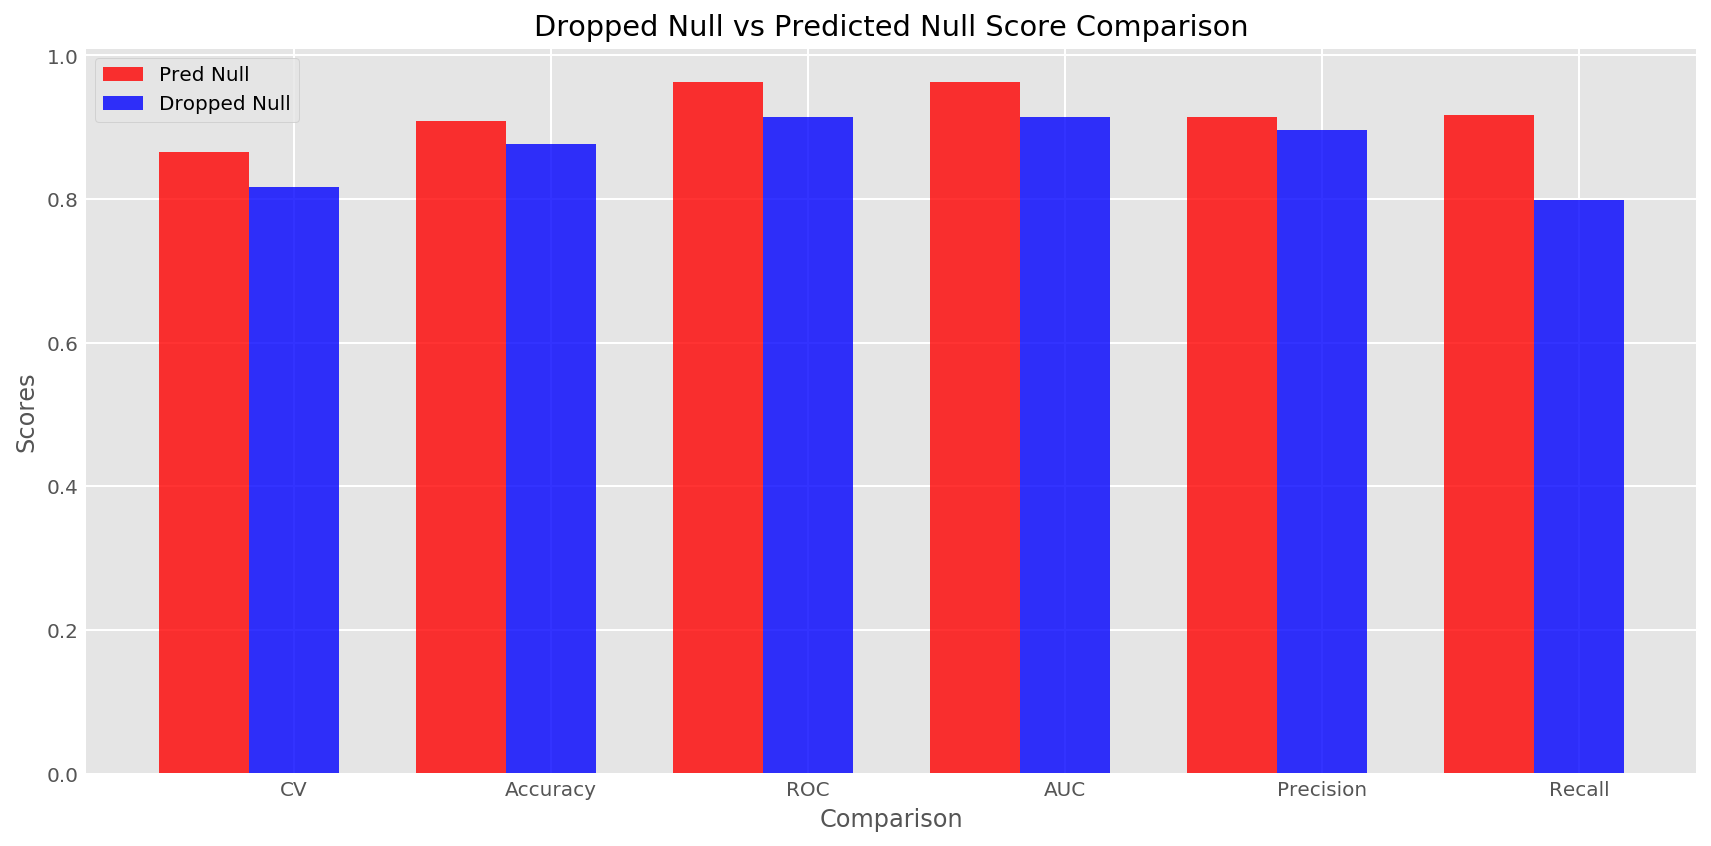

In [142]:
CV =[cross_val_score(gs_BGC.best_estimator_, X_train, y_train, cv=5).mean(),
     cross_val_score(gs_BGC_dn.best_estimator_, X_train_dn, y_train_dn, cv=5).mean(),]
AS = [metrics.accuracy_score(y_train, y_pred_class_BGC),metrics.accuracy_score(y_train_dn, y_pred_class_BGC_dn)]
ROC = [roc_auc_score(y_train,prob_BGC.class_1), roc_auc_score(y_train_dn,prob_BGC_dn.class_1)]
AUC = [auc(fpr_BGC,tpr_BGC), auc(fpr_BGC_dn,tpr_BGC_dn)]
PS = [precision_score(y_train,y_pred_class_BGC), precision_score(y_train_dn,y_pred_class_BGC_dn)]
RC = [recall_score(y_train,y_pred_class_BGC), recall_score(y_train_dn,y_pred_class_BGC_dn)]

n_groups = 6

pred_null = [cross_val_score(gs_BGC.best_estimator_, X_train, y_train, cv=5).mean(),
             metrics.accuracy_score(y_train, y_pred_class_BGC), roc_auc_score(y_train,prob_BGC.class_1),
             auc(fpr_BGC,tpr_BGC), precision_score(y_train,y_pred_class_BGC), recall_score(y_train,y_pred_class_BGC)]

drop_null = [cross_val_score(gs_BGC_dn.best_estimator_, X_train_dn, y_train_dn, cv=5).mean(),
             metrics.accuracy_score(y_train_dn, y_pred_class_BGC_dn), roc_auc_score(y_train_dn,prob_BGC_dn.class_1),
             auc(fpr_BGC_dn,tpr_BGC_dn), precision_score(y_train_dn,y_pred_class_BGC_dn), 
             recall_score(y_train_dn,y_pred_class_BGC_dn)]

fig = plt.figure(figsize=(12,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, pred_null, bar_width, alpha=opacity, color='red', label='Pred Null')
rects2 = plt.bar(index + bar_width, drop_null, bar_width, alpha=opacity, color='blue', label='Dropped Null')

plt.xlabel('Comparison')
plt.ylabel('Scores')
plt.title('Dropped Null vs Predicted Null Score Comparison')
plt.xticks(index + bar_width, ('CV','Accuracy','ROC','AUC','Precision','Recall'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [132]:
prob_BGC = pd.DataFrame(gs_BGC.best_estimator_.predict_proba(X_train), columns=['class_0','class_1'])

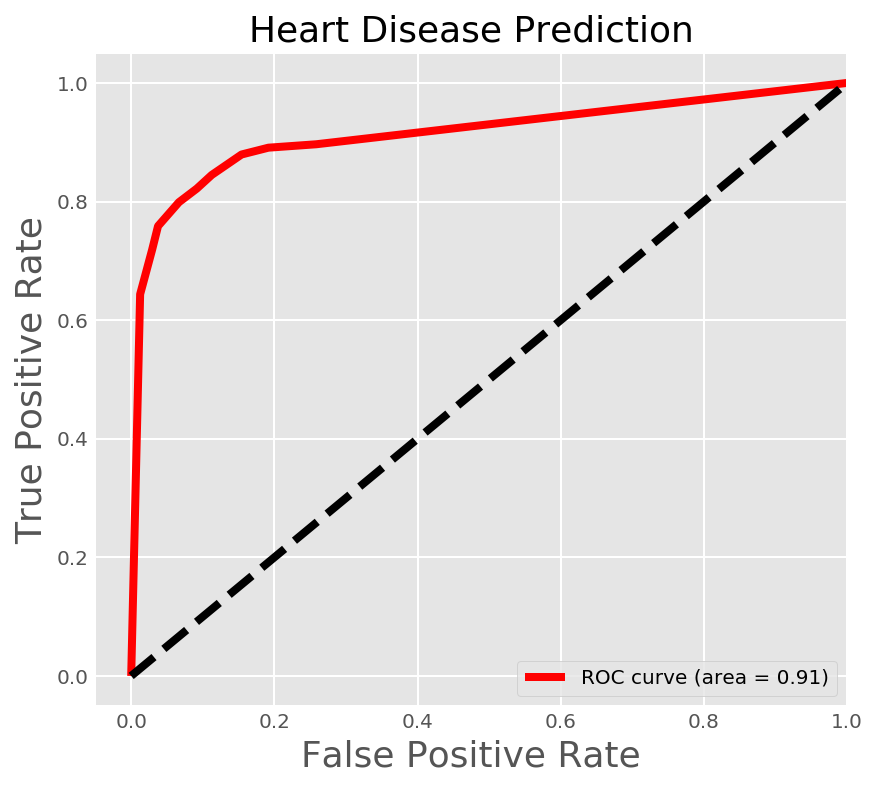

In [133]:
# ROC Curve Graph for Dropped Missing Value Data Frame
fpr, tpr, threshold = roc_curve(y_train_dn, prob_BGC_dn.class_1)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has heart disease)
plt.figure(figsize=[6,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4, color = 'r')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Heart Disease Prediction', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [134]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl",3))

In [135]:
def plot_f1_lines(figsize=(8,6),fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)
    
    # add lines of constant F1 scores
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

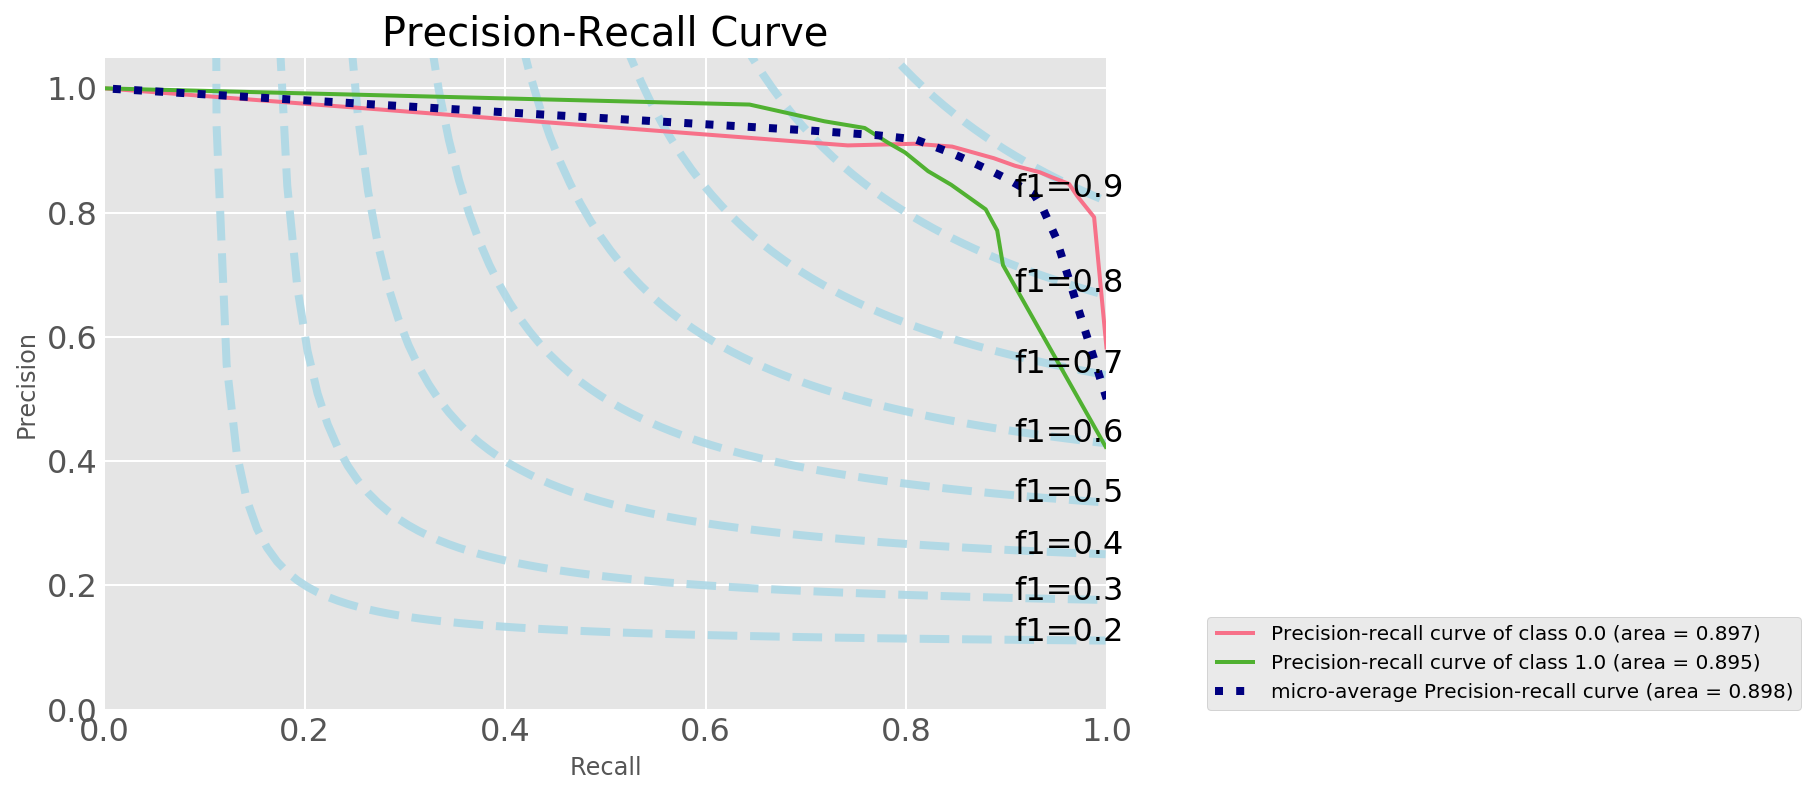

In [136]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_train_dn,  prob_BGC_dn, plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

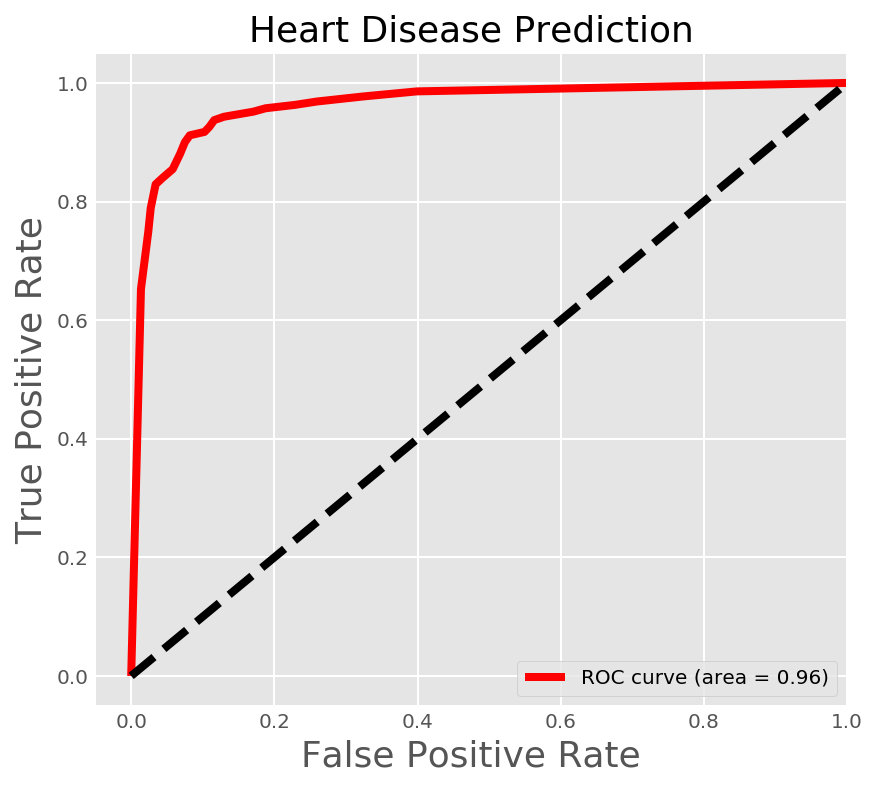

In [137]:
# ROC Curve Graph for Predicted Missing Value Data Frame
fpr, tpr, threshold = roc_curve(y_train,  prob_BGC.class_1)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has heart disease)
plt.figure(figsize=[6,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4, color = 'r')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Heart Disease Prediction', fontsize=18)
plt.legend(loc="lower right")
plt.show()

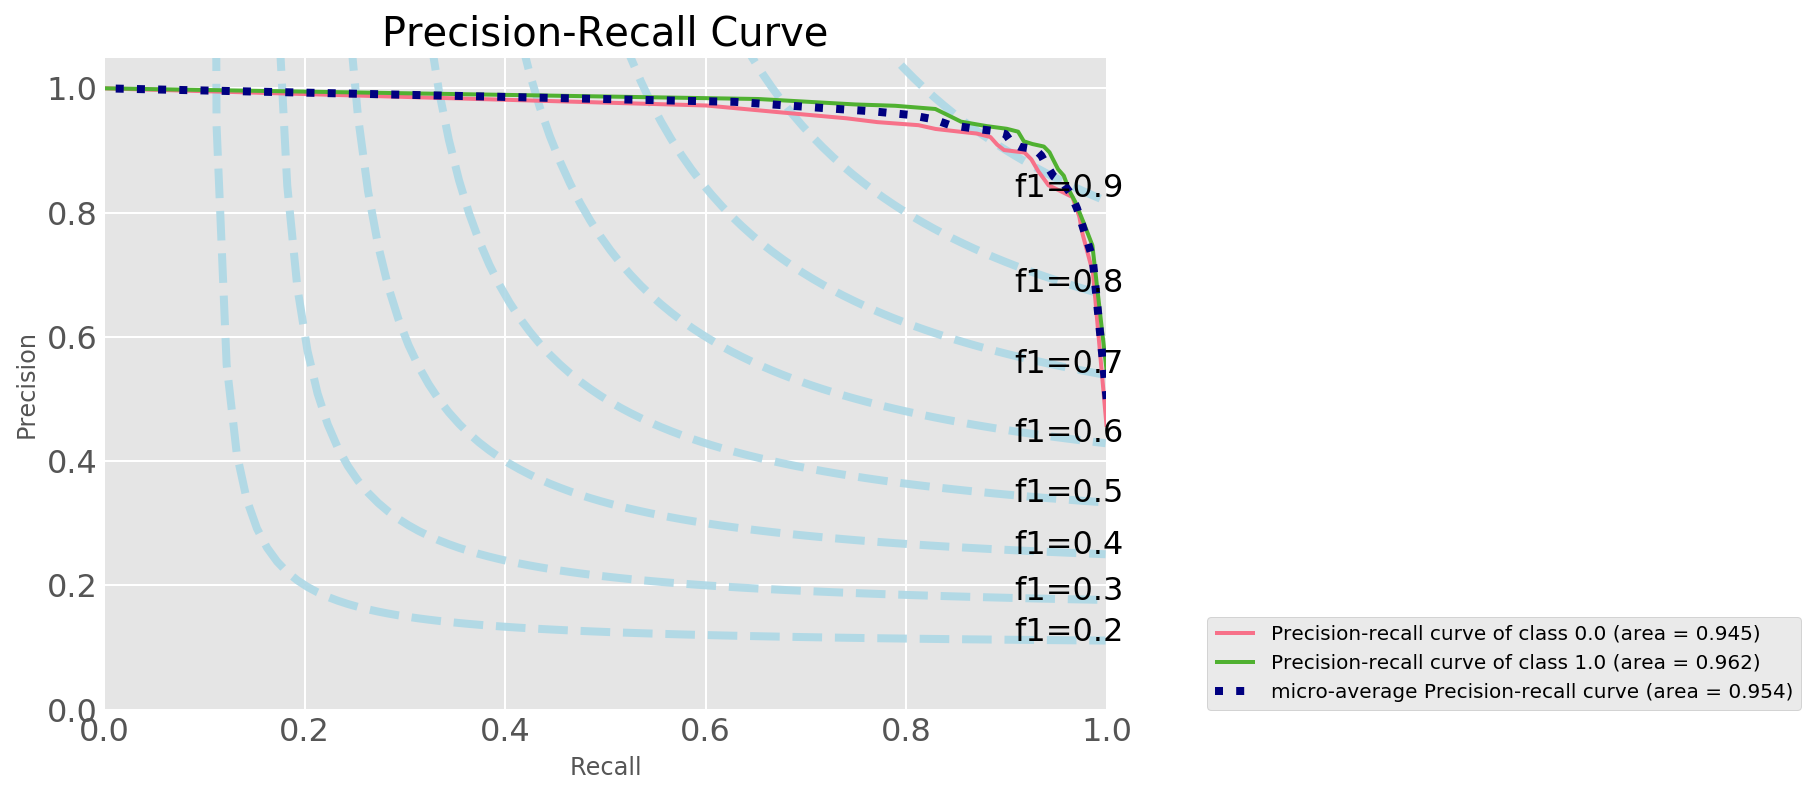

In [138]:
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_train,  prob_BGC, plot_micro=True, title_fontsize=20, text_fontsize=16, 
                                    cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

# 6. Conclusion

All in all, by the analysis we can see that predicting the missing values increases the accuracy. I used two different ways to predict the missing values, first was predicting the whole dataset once, second was predicting by separating the dataset into sex and disease classes. At the end predicting missing values by separating different classes was a better prediction, while it increased the disease prediction. Additionally, both approaches had higher disease prediction than dropping the missing values. On the other hand, using different modelling for the dataset will help us see different methods and increase the accuracy of our analysis at the end. 

Our best model with predicting the missing values has **0.90** of prediction score, if we drop the missing values the score decreases to **0.87**. On the other hand, eliminating less related columns does not help, thus having all the columns is a better way to predict disease. The decrease in the scores are also caused by the number of subjects(patients). If we had more subjects the predictions would have been more accurate. 

Additionally, the recall and precision scores are very important for healthcare classification analysis. When we predicted the null values the recall & precision scores were higher, where recall score is 0.91 and precision score is 0.91. 

In conclusion, this project helps us to predict a heart disease on a subject with **90%** accuracy (by predicting the missing values), which can help doctors to diagnose heart diseases faster. This will increase the time efficiency on the diagnosis and continue with the further testing faster to cure the diseases. 

## Risks & Difficulties
    
The risks for the project:
- The correlation between the columns are not very high 
- While I was doing the missing value predictions for each model the scores were not as high as I expected. 
    - Thus, I split the data frame into sex and pred_attribute to have more accurate predictions for missing values.

The difficulties:
1. Missing Value Prediction
    1. GridSearch parameters for categorical modelling
        - I struggled what to put into the parameters for my categorical modelling. At the end I left it with the default.    
    2. Low modelling scores
        - I had lower scores when I first predicted the missing values. By changing my approach and split the data frame into four different categories the scores increased.
2. Heart Disease Prediction
    1. The scores were overall very high and close to each other, the interpretation was almost the same. 
    2. Choosing Different Models
        - It was hard to find different models to use for my predictions, then I found a kernel on Kaggle which helped me a lot. 
    3. Improving the model
        - After choosing the best columns and compare the new accuracy scores, the scores were decreased. I was hoping to have a better result. This shows my first assumption to improve the accuracy was not right. 
        - Comparing the dropped null data frame scores with the predicted one was a great approach.
    4. Interpretation 
        - During the whole course the biggest struggle for me was the interpretation and again in this report I needed to understand and explain all the results. It was a great practice and I need to work on that more to improve my analysis. 
        
Most of the difficulties were during predicting the missing values, and while using different models understanding the whole theories and concepts of the models. The project helped me understand different models and how prediction can change in different circumstances. 

## Next Steps

This project showed us how to predict heart diseases with highest accuracy. Next, we can increase the analysis by collecting more data, and increase the variety. As a result, our prediction accuracy scores will be higher. I can also predict diseases more specifically and give patients recommendations and how they can continue their treatments. This will help patients understand their disease and help them get through this process. 